In [174]:
import numpy as np
import pandas as pd
import geopandas as gpd
import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import scipy.stats as stats
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read Files

In [2]:
df_temp = pd.read_csv('cleaned_temperature.csv', encoding="utf-8")
print(df_temp.head())

  Country_Code     Country_Name  Year_Month  Temperature
0          ABW    Aruba (Neth.)  1901-01-01        27.20
1          AFG      Afghanistan  1901-01-01        -0.82
2          AGO           Angola  1901-01-01        22.50
3          AIA  Anguilla (U.K.)  1901-01-01        26.10
4          ALA    Åland Islands  1901-01-01        -4.15


In [3]:
df_bird = pd.read_csv('cleaned_data_common_crane.csv')
print(df_bird.head())

                          GLOBAL UNIQUE IDENTIFIER   COMMON NAME  \
0   URN:CornellLabOfOrnithology:EBIRD:OBS533741645  Common Crane   
1   URN:CornellLabOfOrnithology:EBIRD:OBS776499119  Common Crane   
2  URN:CornellLabOfOrnithology:EBIRD:OBS1919716399  Common Crane   
3  URN:CornellLabOfOrnithology:EBIRD:OBS1565666077  Common Crane   
4  URN:CornellLabOfOrnithology:EBIRD:OBS1044855853  Common Crane   

          COUNTRY   LATITUDE  LONGITUDE OBSERVATION DATE  \
0  United Kingdom  52.744315   1.624603       1993-10-08   
1         Finland  59.809343  22.893696       1984-04-15   
2         Finland  61.481060  23.823474       1972-04-20   
3          Sweden  57.278110  14.000840       1991-05-27   
4          Sweden  57.295939  13.944397       1995-07-20   

  TIME OBSERVATIONS STARTED  DURATION MINUTES  
0                  00:00:00              90.0  
1                  00:00:00              90.0  
2                  14:20:00              90.0  
3                  00:00:00           

In [4]:
df_temp

Country_Code       Country_Name  Year_Month  Temperature
0               ABW      Aruba (Neth.)  1901-01-01        27.20
1               AFG        Afghanistan  1901-01-01        -0.82
2               AGO             Angola  1901-01-01        22.50
3               AIA    Anguilla (U.K.)  1901-01-01        26.10
4               ALA      Åland Islands  1901-01-01        -4.15
...             ...                ...         ...          ...
360139          WSM              Samoa  2023-12-01        28.33
360140          YEM  Republic of Yemen  2023-12-01        20.56
360141          ZAF       South Africa  2023-12-01        22.94
360142          ZMB             Zambia  2023-12-01        23.96
360143          ZWE           Zimbabwe  2023-12-01        25.13

[360144 rows x 4 columns]

In [5]:
df_bird

GLOBAL UNIQUE IDENTIFIER   COMMON NAME  \
0        URN:CornellLabOfOrnithology:EBIRD:OBS533741645  Common Crane   
1        URN:CornellLabOfOrnithology:EBIRD:OBS776499119  Common Crane   
2       URN:CornellLabOfOrnithology:EBIRD:OBS1919716399  Common Crane   
3       URN:CornellLabOfOrnithology:EBIRD:OBS1565666077  Common Crane   
4       URN:CornellLabOfOrnithology:EBIRD:OBS1044855853  Common Crane   
...                                                 ...           ...   
269447  URN:CornellLabOfOrnithology:EBIRD:OBS2380171875  Common Crane   
269448  URN:CornellLabOfOrnithology:EBIRD:OBS2203812967  Common Crane   
269449  URN:CornellLabOfOrnithology:EBIRD:OBS2356830335  Common Crane   
269450  URN:CornellLabOfOrnithology:EBIRD:OBS2107003445  Common Crane   
269451  URN:CornellLabOfOrnithology:EBIRD:OBS1971334274  Common Crane   

               COUNTRY   LATITUDE  LONGITUDE OBSERVATION DATE  \
0       United Kingdom  52.744315   1.624603       1993-10-08   
1              Finland  59.809343  22.893696       1984-04-15   
2              Finland  61.481060  23.823474       1972-04-20   
3               Sweden  57.278110  14.000840       1991-05-27   
4               Sweden  57.295939  13.944397       1995-07-20   
...                ...        ...        ...              ...   
269447         Estonia  58.421718  24.997158       2024-05-23   
269448           Spain  42.029547  -1.183709       2024-05-30   
269449       Lithuania  55.699346  24.963632       2024-07-30   
269450         Finland  61.727326  29.698195       2024-04-29   
269451         Germany  50.000805   8.050618       2024-02-17   

       TIME OBSERVATIONS STARTED  DURATION MINUTES  
0                       00:00:00              90.0  
1                       00:00:00              90.0  
2                       14:20:00              90.0  
3                       00:00:00              90.0  
4                       10:30:00             450.0  
...                          ...               ...  
269447                  21:05:00              95.0  
269448                  10:49:00              17.0  
269449                  19:42:00              90.0  
269450                  13:06:00             240.0  
269451                  14:05:00             150.0  

[269452 rows x 8 columns]

# Temperature Trends

Calculating the average temperature per year for every country combined.

In [6]:
df_temp["Year_Month"] = pd.to_datetime(df_temp["Year_Month"])
df_temp["Year"] = df_temp["Year_Month"].dt.year

df_yearly = df_temp.groupby(["Country_Code", "Country_Name", "Year"])["Temperature"].mean().reset_index()

df_yearly_temp = df_temp.groupby("Year")["Temperature"].mean().reset_index()


Plotting the average yearly temperature across the globe.

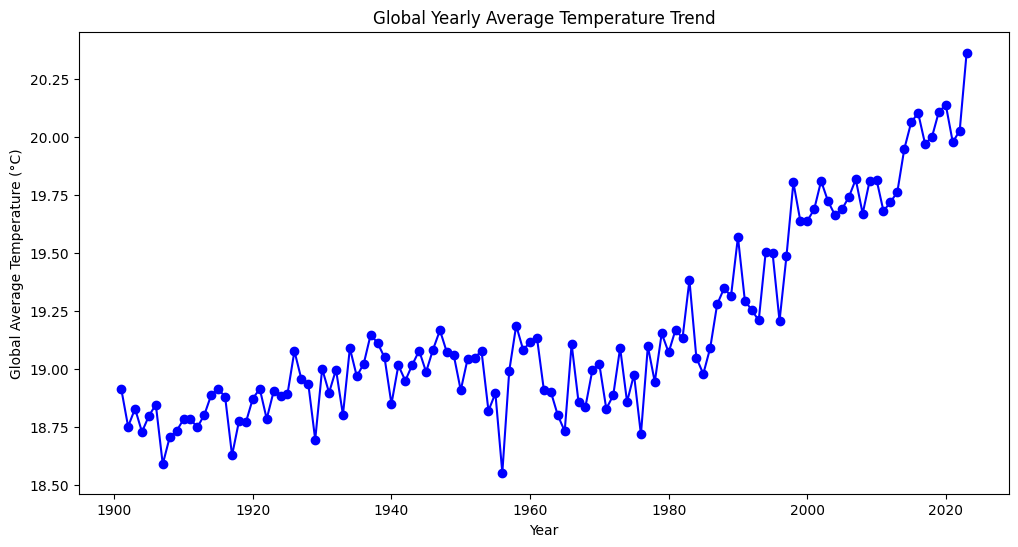

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df_yearly_temp["Year"], df_yearly_temp["Temperature"], marker='o', linestyle='-', color='blue')

plt.xlabel("Year")
plt.ylabel("Global Average Temperature (°C)")
plt.title("Global Yearly Average Temperature Trend")

plt.show()
plt.show()

Plotting a regression plot to show the trend in the average yearly temperature across the globe.

The quadratic plot is shown to fit the data better than the linear plot. This shows that not only is the temperature recorded increasing, but that it is accelerating, meaning the planet is getting hotter faster.

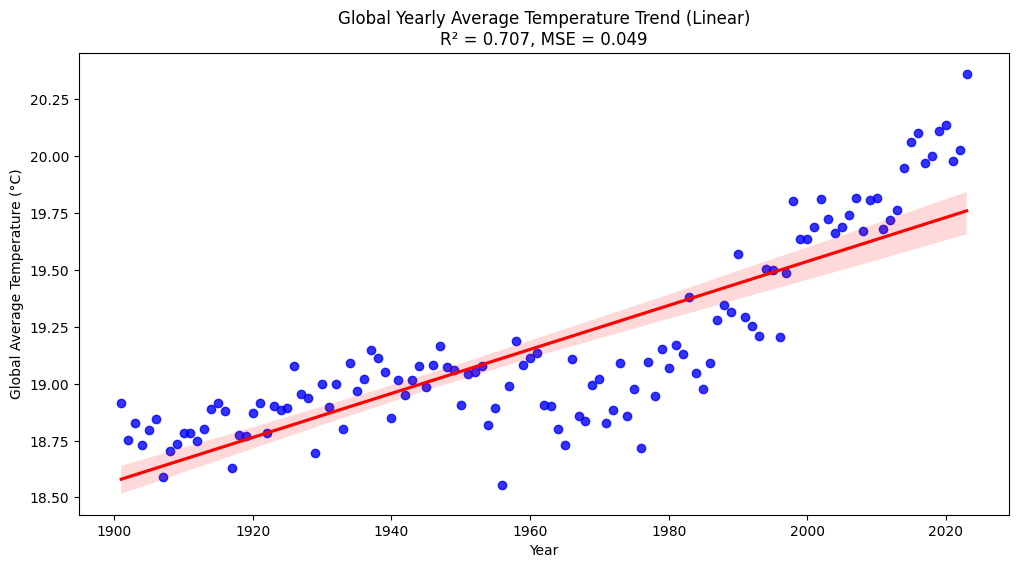

In [8]:
reg_model = LinearRegression()
reg_model.fit(df_yearly_temp[["Year"]], df_yearly_temp["Temperature"])
predictions = reg_model.predict(df_yearly_temp[["Year"]])

mse = mean_squared_error(df_yearly_temp["Temperature"], predictions)
r2 = r2_score(df_yearly_temp["Temperature"], predictions)

plt.figure(figsize=(12, 6))
sns.regplot(x="Year", y="Temperature", data=df_yearly_temp, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel("Year")
plt.ylabel("Global Average Temperature (°C)")
plt.title(f"Global Yearly Average Temperature Trend (Linear)\nR² = {r2:.3f}, MSE = {mse:.3f}")
plt.show()


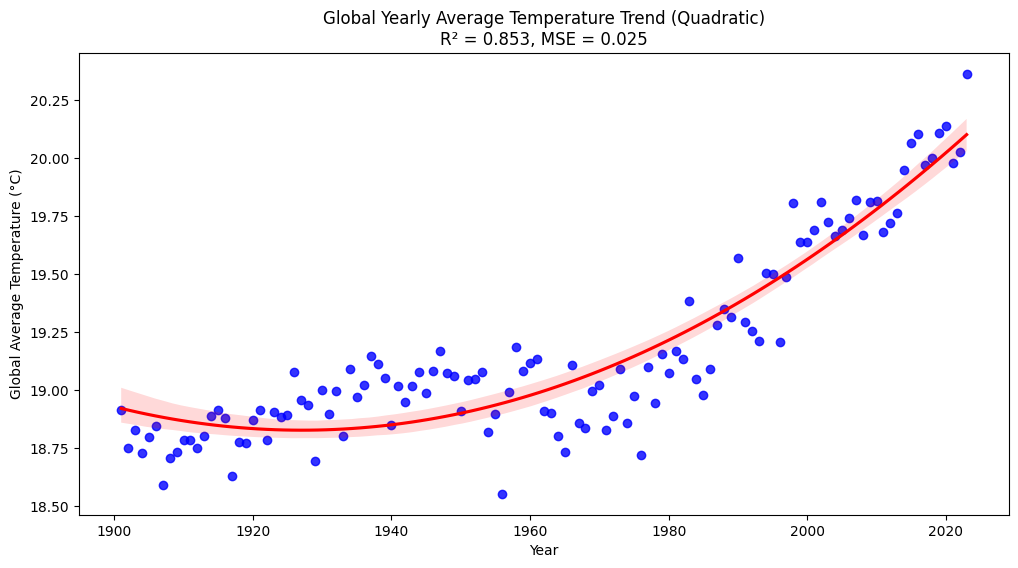

In [9]:
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(df_yearly_temp[["Year"]], df_yearly_temp["Temperature"])
poly_predictions = poly_model.predict(df_yearly_temp[["Year"]])

mse_poly = mean_squared_error(df_yearly_temp["Temperature"], poly_predictions)
r2_poly = r2_score(df_yearly_temp["Temperature"], poly_predictions)

plt.figure(figsize=(12, 6))
sns.regplot(x="Year", y="Temperature", data=df_yearly_temp, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, order=2)
plt.xlabel("Year")
plt.ylabel("Global Average Temperature (°C)")
plt.title(f"Global Yearly Average Temperature Trend (Quadratic)\nR² = {r2_poly:.3f}, MSE = {mse_poly:.3f}")
plt.show()


R² and MSE calculations for the graphs show that the quadtratic fits our data better.

- R² is better for the quadratic graph (85 %) vs the linear graph (71 %). The quadratic model better captures a strong trend in our data.
- MSE is smaller for the .

In [10]:
reg_model = LinearRegression()

reg_model.fit(df_yearly_temp[["Year"]], df_yearly_temp["Temperature"])

predictions = reg_model.predict(df_yearly_temp[["Year"]])

mse = mean_squared_error(df_yearly_temp["Temperature"], predictions)

r2 = r2_score(df_yearly_temp["Temperature"], predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2: {r2}")

Mean Squared Error (MSE): 0.04888601716040785
R^2: 0.7067934488806324


Working out the maximum and minimum temperature every recorded in our data.

In [11]:
min_temp = df_temp["Temperature"].min()
max_temp = df_temp["Temperature"].max()

print(f"Minimum Temperature: {min_temp}°C")
print(f"Maximum Temperature: {max_temp}°C")

Minimum Temperature: -36.48°C
Maximum Temperature: 39.48°C


Plotting the average temperature for every country, and colour coordinating.

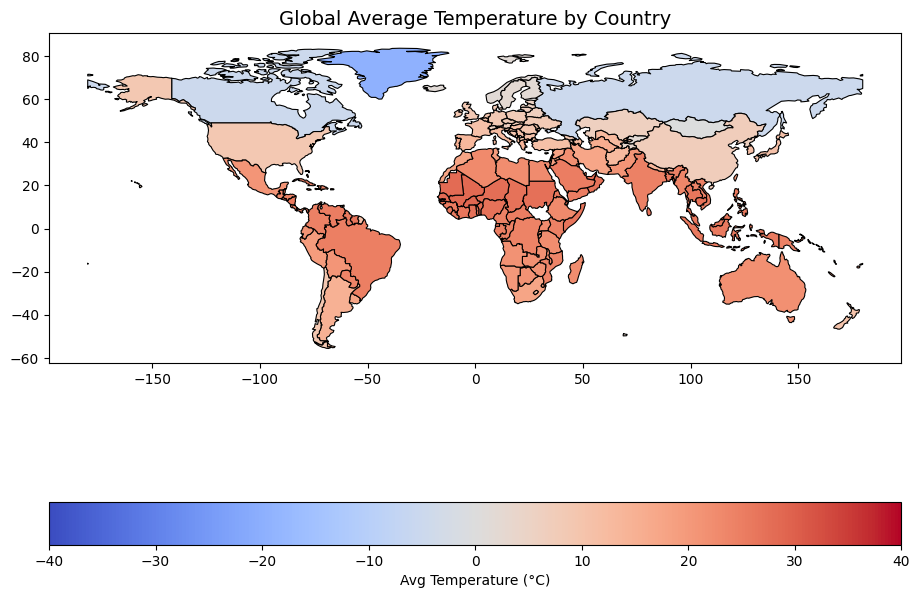

In [12]:
df_avg_temp = df_temp.groupby("Country_Code")["Temperature"].mean().reset_index()

world = gpd.read_file("ne_110m_admin_0_countries.geojson")

world = world.merge(df_avg_temp, left_on="ADM0_A3", right_on="Country_Code", how="left")

fig, ax = plt.subplots(1, 1, figsize=(11, 12))
world.plot(column="Temperature", cmap="coolwarm", linewidth=0.8, edgecolor="black",
           legend=True, legend_kwds={"label": "Avg Temperature (°C)", "orientation": "horizontal"},
           ax=ax, vmin=-40, vmax=40)

ax.set_title("Global Average Temperature by Country", fontsize=14)
plt.show()

# Common Crane Migration Trends

https://www.researchgate.net/figure/Migratory-Routes-of-Common-Crane_fig1_319526523

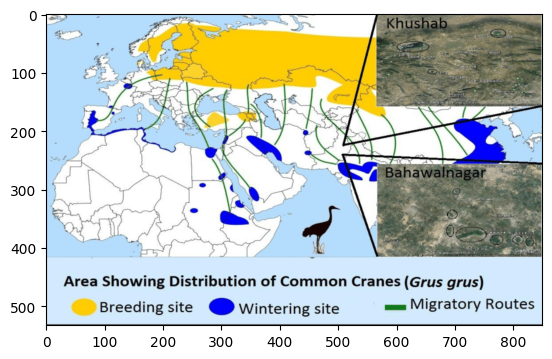

In [13]:
img = mpimg.imread('Migratory-Routes-of-Common-Crane.png')
imgplot = plt.imshow(img)
plt.show()

In [14]:
df_bird['OBSERVATION DATE'] = pd.to_datetime(df_bird['OBSERVATION DATE'])

The common crane migrates south in the autumn, and migrates north to their breeding grounds in the spring.

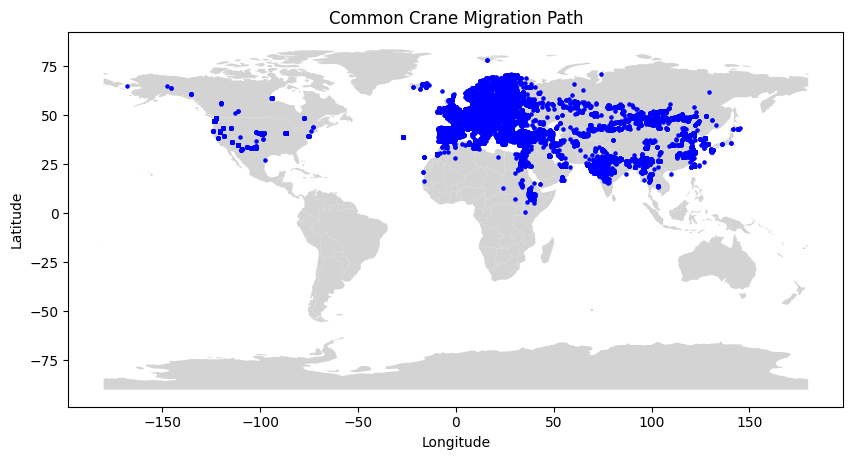

In [15]:
world = gpd.read_file("110m_cultural/ne_110m_admin_0_countries.shp")

fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color="lightgrey")

ax.scatter(df_bird["LONGITUDE"], df_bird["LATITUDE"], color="blue", alpha=1, s=5)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Common Crane Migration Path")

plt.show()


The common cranes are native to Europe, Asia, and parts of Africa. Sightings elsewhere are likely to be caused by captive birds being released into the wild. We shall filter the data based on these facts.

In [16]:
df_bird_filtered = df_bird[
    ((df_bird['LONGITUDE'] >= -30) & (df_bird['LONGITUDE'] <= 60) & (df_bird['LATITUDE'] >= 35) & (df_bird['LATITUDE'] <= 72)) |  # Europe
    ((df_bird['LONGITUDE'] >= 60) & (df_bird['LONGITUDE'] <= 180) & (df_bird['LATITUDE'] >= 10) & (df_bird['LATITUDE'] <= 80)) |  # Asia
    ((df_bird['LONGITUDE'] >= -20) & (df_bird['LONGITUDE'] <= 60) & (df_bird['LATITUDE'] >= 20) & (df_bird['LATITUDE'] <= 40))  # North Africa
]

Lots of sightings of common crane, except in summer (which is their breeding season, so this is as expected)

/var/folders/ff/bcb9x_dn5w33rzn_y_fyqfdh0000gn/T/ipykernel_36181/4216594027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bird_filtered.loc[:, 'month'] = df_bird_filtered['OBSERVATION DATE'].dt.month


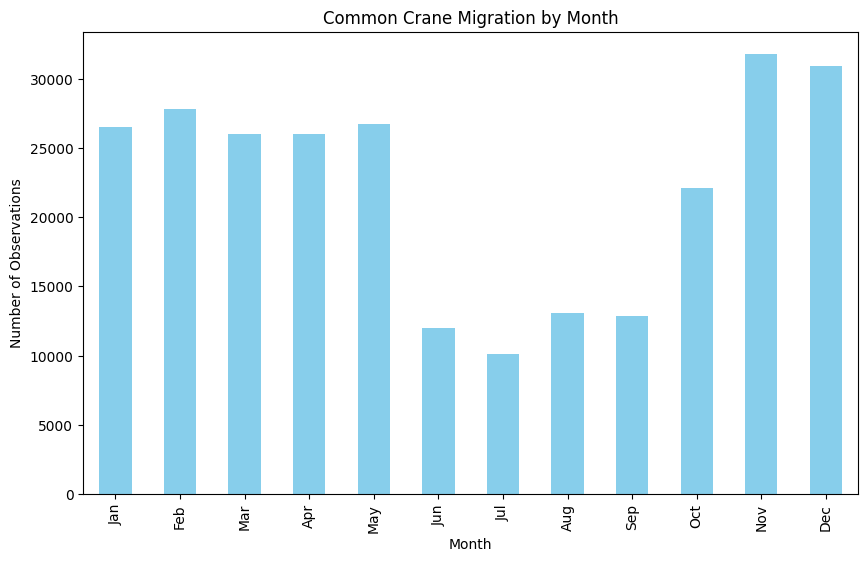

In [17]:
df_bird_filtered.loc[:, 'month'] = df_bird_filtered['OBSERVATION DATE'].dt.month
monthly_migrations = df_bird_filtered.groupby('month').size()

plt.figure(figsize=(10, 6))
monthly_migrations.plot(kind='bar', color='skyblue')
plt.title('Common Crane Migration by Month')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=month_names)
plt.show()


We can view when in the day these birds are most sighted. It is likely that the large spike at midnight is due to the sighting time not being recorded correctly, leading to that sighting defaulting at 0.

/var/folders/ff/bcb9x_dn5w33rzn_y_fyqfdh0000gn/T/ipykernel_36181/287892850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bird_filtered.loc[:, 'start_hour'] = pd.to_datetime(df_bird_filtered['TIME OBSERVATIONS STARTED'], format='%H:%M:%S').dt.hour


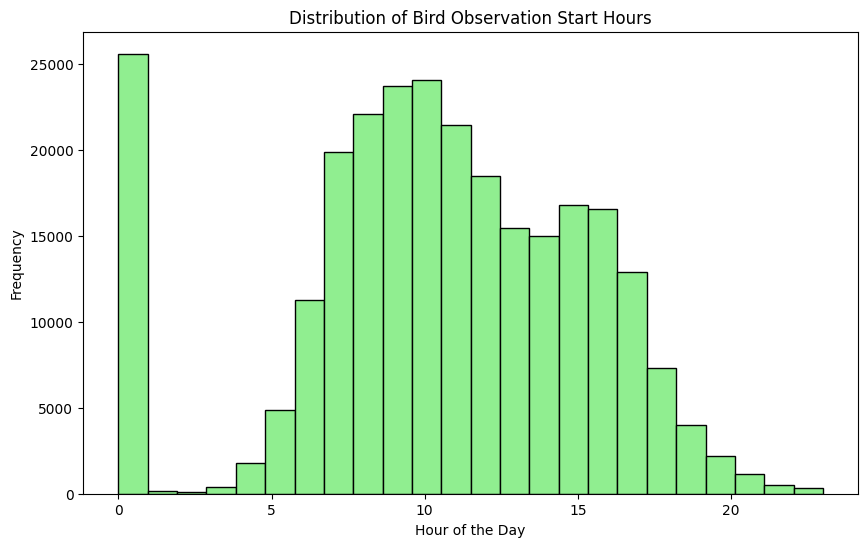

In [18]:
df_bird_filtered.loc[:, 'start_hour'] = pd.to_datetime(df_bird_filtered['TIME OBSERVATIONS STARTED'], format='%H:%M:%S').dt.hour

plt.figure(figsize=(10, 6))
df_bird_filtered['start_hour'].plot(kind='hist', bins=24, color='lightgreen', edgecolor='black')
plt.title("Distribution of Bird Observation Start Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.show()

We can work out how long the average sighting was for.

In [19]:
avg_duration = df_bird_filtered.groupby('COMMON NAME')['DURATION MINUTES'].mean()
print(avg_duration)

COMMON NAME
Common Crane    123.705987
Name: DURATION MINUTES, dtype: float64


# Plotting Migration on Maps

### Europe/Asia/Africa

Lets plot our common crane sightings on a map to better visualise where our common cranes are seen.

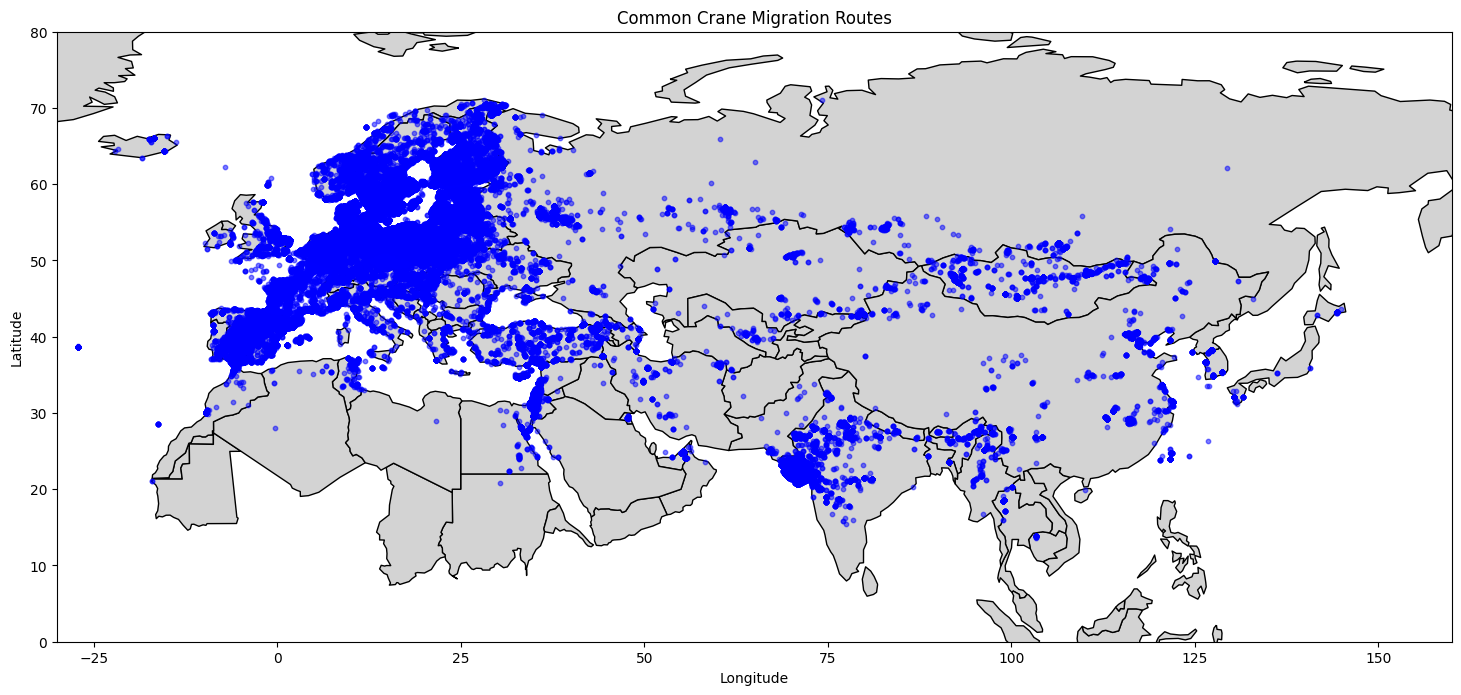

In [20]:
world = gpd.read_file("110m_cultural/ne_110m_admin_0_countries.shp")

european_countries = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']
asian_countries = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']
north_african_countries = ['Algeria', 'Bahrain', 'Chad', 'Egypt', 'Eritrea', 'Libya', 'Mauritania', 'Morocco', 'Oman', 'Sudan', 'Syria', 'Tunisia', 'Western Sahara']

valid_countries = european_countries + asian_countries + north_african_countries

world = world[world["SOVEREIGNT"].isin(valid_countries)]

min_longitude, max_longitude = -30, 160  
min_latitude, max_latitude = 0, 80    

fig, ax = plt.subplots(figsize=(18, 14))
world.plot(ax=ax, color="lightgrey", edgecolor="black")

ax.scatter(
    df_bird_filtered["LONGITUDE"], 
    df_bird_filtered["LATITUDE"], 
    c="blue", s=10, alpha=0.5
)

ax.set_xlim(min_longitude, max_longitude)
ax.set_ylim(min_latitude, max_latitude)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Common Crane Migration Routes")

plt.show()

The common crane migrates south during the autumn and migrate north during the summer. You can see visualise locations they use for summer and winter below.

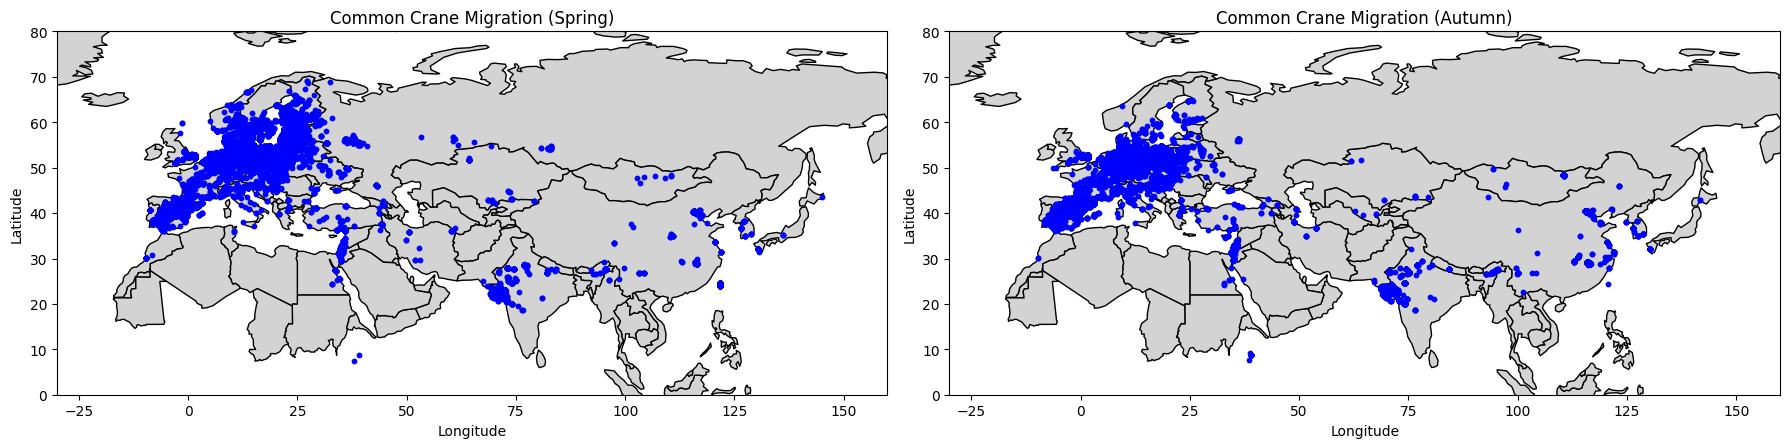

In [21]:
world = gpd.read_file("110m_cultural/ne_110m_admin_0_countries.shp")

df_bird_spr = df_bird[
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 2)) |
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 3)) |
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 4))
]

df_bird_aut = df_bird[
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 10)) |
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 11)) |
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 12))
]

european_countries = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']
asian_countries = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']
north_african_countries = ['Algeria', 'Bahrain', 'Chad', 'Egypt', 'Eritrea', 'Libya', 'Mauritania', 'Morocco', 'Oman', 'Sudan', 'Syria', 'Tunisia', 'Western Sahara']

valid_countries = european_countries + asian_countries + north_african_countries

world = world[world["SOVEREIGNT"].isin(valid_countries)]

min_longitude, max_longitude = -30, 160  
min_latitude, max_latitude = 0, 80   

fig, axes = plt.subplots(1, 2, figsize=(18, 12))

# Plot for Spring Migration
ax1 = axes[0]
world.plot(ax=ax1, color="lightgrey", edgecolor="black")
ax1.scatter(
    df_bird_spr["LONGITUDE"], 
    df_bird_spr["LATITUDE"], 
    c="blue", s=10, alpha=1
)
ax1.set_xlim(min_longitude, max_longitude)
ax1.set_ylim(min_latitude, max_latitude)
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.set_title("Common Crane Migration (Spring)")

# Plot for Autumn Migration
ax2 = axes[1]
world.plot(ax=ax2, color="lightgrey", edgecolor="black")
ax2.scatter(
    df_bird_aut["LONGITUDE"], 
    df_bird_aut["LATITUDE"], 
    c="blue", s=10, alpha=1
)
ax2.set_xlim(min_longitude, max_longitude)
ax2.set_ylim(min_latitude, max_latitude)
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
ax2.set_title("Common Crane Migration (Autumn)")

plt.tight_layout()
plt.show()


### Europe

Lets look at just common crane sightings in europe.

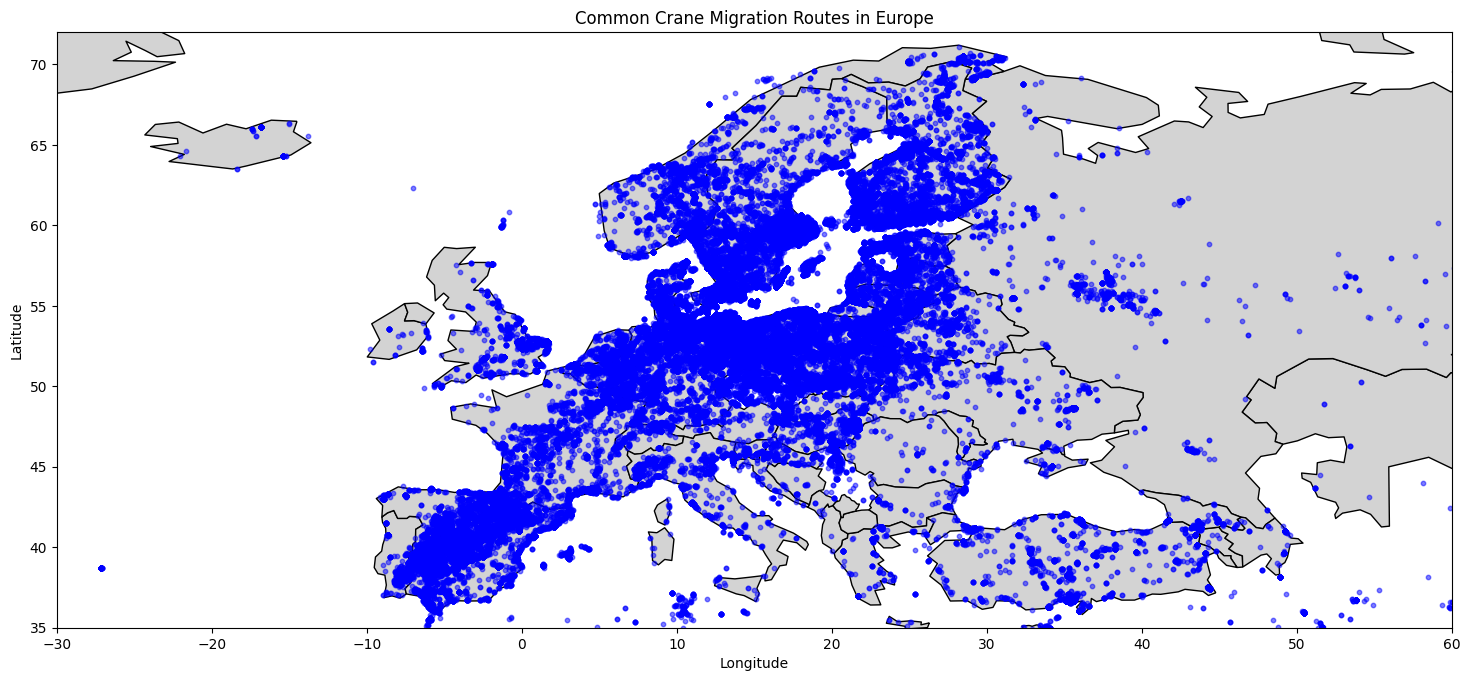

In [22]:
world = gpd.read_file("110m_cultural/ne_110m_admin_0_countries.shp")

european_countries = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']

world = world[world["SOVEREIGNT"].isin(european_countries)]

min_longitude, max_longitude = -30, 60  
min_latitude, max_latitude = 35, 72   

fig, ax = plt.subplots(figsize=(18, 14))
world.plot(ax=ax, color="lightgrey", edgecolor="black")

ax.scatter(
    df_bird_filtered["LONGITUDE"], 
    df_bird_filtered["LATITUDE"], 
    c="blue", s=10, alpha=0.5
)

ax.set_xlim(min_longitude, max_longitude)
ax.set_ylim(min_latitude, max_latitude)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Common Crane Migration Routes in Europe")

plt.show()


In the autumn, there are lots of birds in the south (particularly in spain). This is one of their wintering locations, so this is as we would expect.

In the spring, the birds migrate to north-eastern europe for breeding season. The maps below show a larger density of sightings in this area of europe.

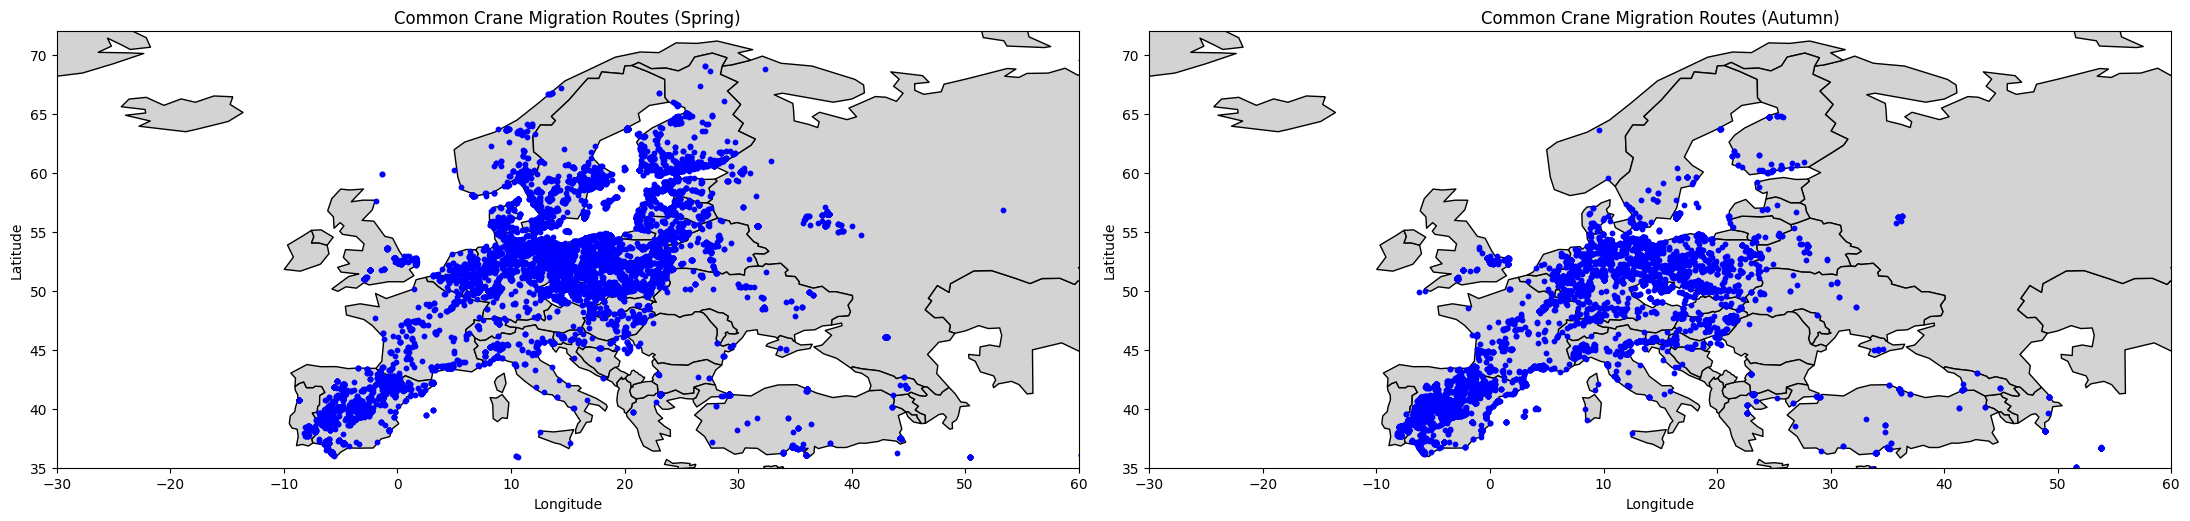

In [23]:

df_bird_spring = df_bird[
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 2)) |
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 3)) | 
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 4))
]

df_bird_autumn = df_bird[
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 10)) | 
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 11)) | 
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 12))
]

world = gpd.read_file("110m_cultural/ne_110m_admin_0_countries.shp")

european_countries = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']

world = world[world["SOVEREIGNT"].isin(european_countries)]

min_longitude, max_longitude = -30, 60  
min_latitude, max_latitude = 35, 72   

fig, axes = plt.subplots(1, 2, figsize=(22, 18))

# Plot for Spring
axes[0].set_title("Common Crane Migration Routes (Spring)")
world.plot(ax=axes[0], color="lightgrey", edgecolor="black")
axes[0].scatter(df_bird_spring["LONGITUDE"], df_bird_spring["LATITUDE"], c="blue", s=10, alpha=1)
axes[0].set_xlim(min_longitude, max_longitude)
axes[0].set_ylim(min_latitude, max_latitude)
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# Plot for Autumn
axes[1].set_title("Common Crane Migration Routes (Autumn)")
world.plot(ax=axes[1], color="lightgrey", edgecolor="black")
axes[1].scatter(df_bird_autumn["LONGITUDE"], df_bird_autumn["LATITUDE"], c="blue", s=10, alpha=1)
axes[1].set_xlim(min_longitude, max_longitude)
axes[1].set_ylim(min_latitude, max_latitude)
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

plt.tight_layout()
plt.show()


These migration maps illustrate the seasonal movement patterns of common cranes in Europe. You can see one of their migration routes through the centre of France.

The first map (Autumn):
- Shows a high concentration of sightings in Central and Western Europe, particularly in Germany, France, and Spain.
- This suggests that cranes migrate southwest from their northern breeding grounds (mainly in Scandinavia and Eastern Europe) towards their wintering areas, primarily in Spain and France.
- Some cranes are also seen further east, indicating alternative migration routes.

The second map (Spring):
- Displays more concentrated sightings in Eastern and Northern Europe, particularly in Poland, Germany, and Scandinavia.
- This indicates a northward migration as cranes return to their breeding grounds.
- The overall spread is slightly more northeastern compared to autumn, reflecting different stopover points used during spring migration.
- The main difference is that in autumn, cranes are moving southwest toward wintering areas, while in spring, they are heading northeast back to breeding grounds.

# Heatmaps

### Europe/Asia/Africa

Although the previous graphs give us some insight into how the density of common cranes in certain locations changes based on the season, it can be quite hard to see those chnaged in density on those maps alone.

Below, we shall construct a heatmap which will give us a better insight into the density of our bird sightings and how that changes during the year.

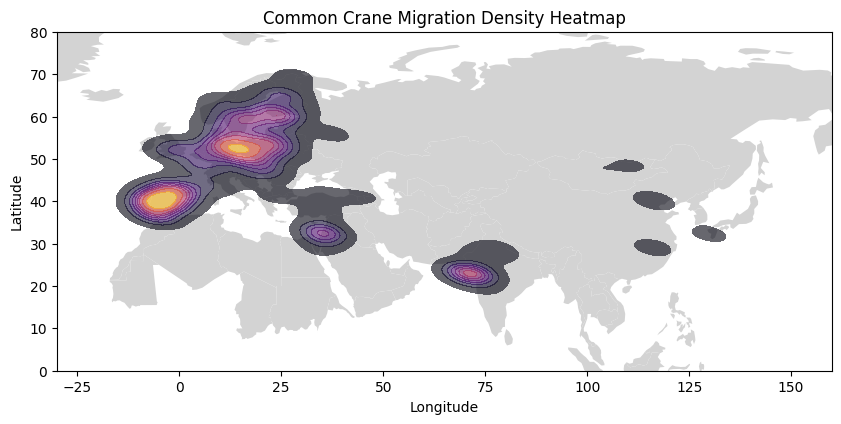

In [24]:
world = gpd.read_file("110m_cultural/ne_110m_admin_0_countries.shp")

european_countries = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']
asian_countries = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']
north_african_countries = ['Algeria', 'Bahrain', 'Chad', 'Egypt', 'Eritrea', 'Libya', 'Mauritania', 'Morocco', 'Oman', 'Sudan', 'Syria', 'Tunisia', 'Western Sahara']

valid_countries = european_countries + asian_countries + north_african_countries

world = world[world["SOVEREIGNT"].isin(valid_countries)]


min_longitude, max_longitude = -30, 160 
min_latitude, max_latitude = 0, 80   

fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color="lightgrey")

sns.kdeplot(
    x=df_bird_filtered["LONGITUDE"], y=df_bird_filtered["LATITUDE"],
    cmap="inferno", fill=True, alpha=0.6, ax=ax
)

ax.set_xlim(min_longitude, max_longitude)
ax.set_ylim(min_latitude, max_latitude)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Common Crane Migration Density Heatmap")
plt.show()

Lets break this down by summer and winter seasons, which will give us some insight in where the Common Crane nests during the breeding and winter seasons.

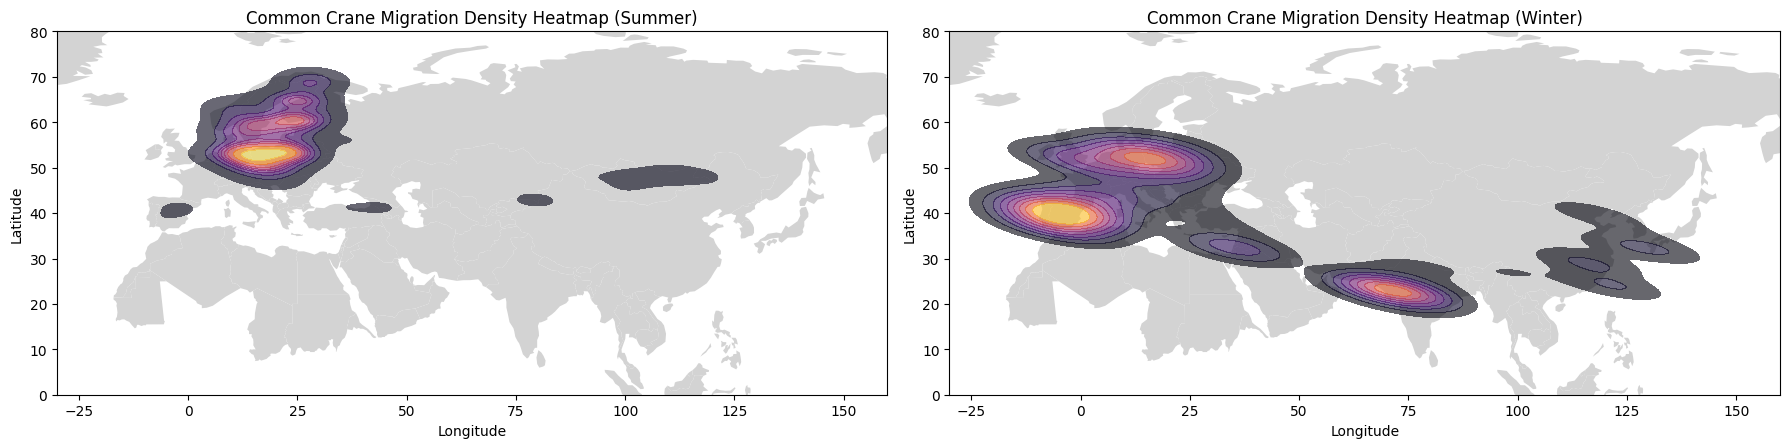

In [25]:
df_bird_summer_all = df_bird[
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 5)) |
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 6)) |
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 7))
]

df_bird_winter_all = df_bird[
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 12)) |
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 1)) |
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 2))
]

world = gpd.read_file("110m_cultural/ne_110m_admin_0_countries.shp")

european_countries = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']
asian_countries = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']
north_african_countries = ['Algeria', 'Bahrain', 'Chad', 'Egypt', 'Eritrea', 'Libya', 'Mauritania', 'Morocco', 'Oman', 'Sudan', 'Syria', 'Tunisia', 'Western Sahara']

valid_countries = european_countries + asian_countries + north_african_countries

world = world[world["SOVEREIGNT"].isin(valid_countries)]

min_longitude, max_longitude  = -30, 160 
min_latitude, max_latitude  = 0, 80   

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot for Spring
axes[0].set_title("Common Crane Migration Density Heatmap (Summer)")
world.plot(ax=axes[0], color="lightgrey")
sns.kdeplot(
    x=df_bird_summer_all["LONGITUDE"], y=df_bird_summer_all["LATITUDE"],
    cmap="inferno", fill=True, alpha=0.6, ax=axes[0]
)
axes[0].set_xlim(min_longitude, max_longitude)
axes[0].set_ylim(min_latitude, max_latitude)
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# Plot for Autumn
axes[1].set_title("Common Crane Migration Density Heatmap (Winter)")
world.plot(ax=axes[1], color="lightgrey")
sns.kdeplot(
    x=df_bird_winter_all["LONGITUDE"], y=df_bird_winter_all["LATITUDE"],
    cmap="inferno", fill=True, alpha=0.6, ax=axes[1]
)
axes[1].set_xlim(min_longitude, max_longitude)
axes[1].set_ylim(min_latitude, max_latitude)
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

plt.tight_layout()
plt.show()

Here, you can better see that there is a larger density of common cranes in north-eastern europe during the summer months. This is where the cranes go for their breeding season.

On the right, we can see that there as stronger densities of common cranes in south-western europe (e.g. spain) and also parts of asia. This is consistant with where common cranes migrate to in the winter months (spain, parts of the middle east, parts of india, and western china).

### Europe

Lets zoom in on just Europe again.

In [26]:
df_bird_europe = df_bird_filtered[
    (df_bird_filtered["LONGITUDE"] >= -31) &
    (df_bird_filtered["LONGITUDE"] <= 60) &
    (df_bird_filtered["LATITUDE"] >= 35) &
    (df_bird_filtered["LATITUDE"] <= 72)
]

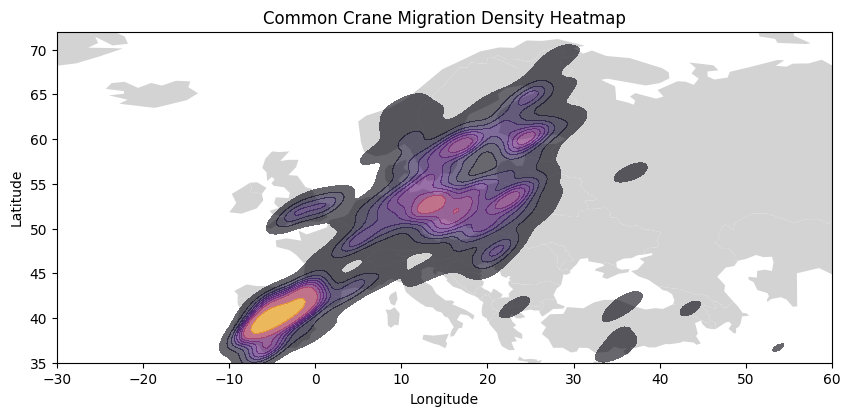

In [27]:
world = gpd.read_file("110m_cultural/ne_110m_admin_0_countries.shp")

european_countries = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 
                      'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 
                      'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 
                      'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 
                      'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']

world = world[world["SOVEREIGNT"].isin(european_countries)]

min_longitude, max_longitude = -30, 60 
min_latitude, max_latitude = 35, 72  

fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color="lightgrey")

sns.kdeplot(
    x=df_bird_europe["LONGITUDE"], y=df_bird_europe["LATITUDE"],
    cmap="inferno", fill=True, alpha=0.6, ax=ax
)

ax.set_xlim(min_longitude, max_longitude)
ax.set_ylim(min_latitude, max_latitude)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Common Crane Migration Density Heatmap")
plt.show()

To view seasonal trends, we will filter by spring and autumn months.

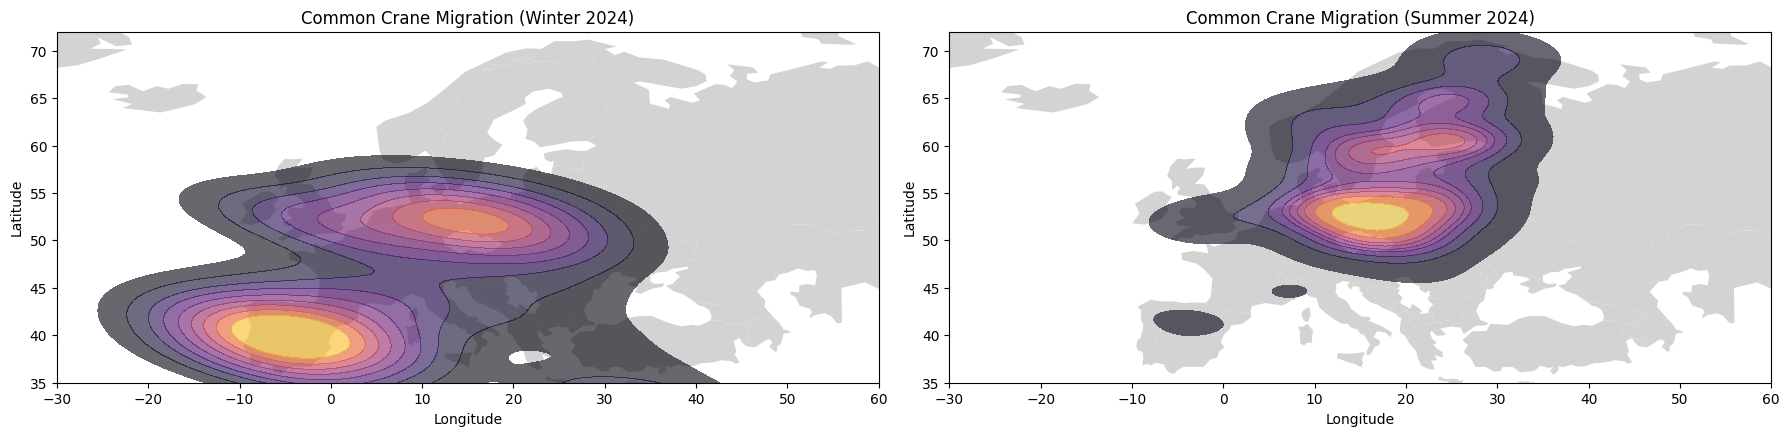

In [28]:
world = gpd.read_file("110m_cultural/ne_110m_admin_0_countries.shp")

european_countries = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 
                      'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 
                      'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 
                      'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 
                      'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 
                      'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']

world = world[world["SOVEREIGNT"].isin(european_countries)]

min_longitude, max_longitude = -30, 60
min_latitude, max_latitude = 35, 72

df_bird_winter = df_bird[
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 12)) |
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 1)) |
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 2))
]

df_bird_summer = df_bird[
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 6)) |
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 7)) |
    ((df_bird['OBSERVATION DATE'].dt.year == 2024) & (df_bird['OBSERVATION DATE'].dt.month == 8)) 
]

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot for Spring
world.plot(ax=axes[0], color="lightgrey")
sns.kdeplot(x=df_bird_winter["LONGITUDE"], y=df_bird_winter["LATITUDE"], cmap="inferno", fill=True, alpha=0.6, ax=axes[0])
axes[0].set_xlim(min_longitude, max_longitude)
axes[0].set_ylim(min_latitude, max_latitude)
axes[0].set_title("Common Crane Migration (Winter 2024)")

# Plot for Autumn
world.plot(ax=axes[1], color="lightgrey")
sns.kdeplot(x=df_bird_summer["LONGITUDE"], y=df_bird_summer["LATITUDE"], cmap="inferno", fill=True, alpha=0.6, ax=axes[1])
axes[1].set_xlim(min_longitude, max_longitude)
axes[1].set_ylim(min_latitude, max_latitude)
axes[1].set_title("Common Crane Migration (Summer 2024)")

for ax in axes:
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


Here, we can get a really good look at the breeding and winter locations of the common crane. There is a really high density of birds in eastern europe during the summer, when they have migrated north for breeding season, and a very high density of common cranes in spain during the summer season, where the birds go for the winter seasons.

# Merging the Datasets

Here, we shall merge our temperature and common crane datasets.

In [29]:
df_temp['Year_Month'] = pd.to_datetime(df_temp['Year_Month']).dt.to_period('M')
df_bird['OBSERVATION DATE'] = pd.to_datetime(df_bird['OBSERVATION DATE'])
df_bird['Year_Month'] = df_bird['OBSERVATION DATE'].dt.to_period('M')

print(df_temp.dtypes)
print(df_bird.dtypes)

merged_df = df_bird.merge(df_temp, left_on=['COUNTRY', 'Year_Month'], right_on=['Country_Name', 'Year_Month'], how='inner')

print(merged_df.head())

Country_Code       object
Country_Name       object
Year_Month      period[M]
Temperature       float64
Year                int32
dtype: object
GLOBAL UNIQUE IDENTIFIER             object
COMMON NAME                          object
COUNTRY                              object
LATITUDE                            float64
LONGITUDE                           float64
OBSERVATION DATE             datetime64[ns]
TIME OBSERVATIONS STARTED            object
DURATION MINUTES                    float64
Year_Month                        period[M]
dtype: object
                          GLOBAL UNIQUE IDENTIFIER   COMMON NAME  \
0   URN:CornellLabOfOrnithology:EBIRD:OBS533741645  Common Crane   
1   URN:CornellLabOfOrnithology:EBIRD:OBS776499119  Common Crane   
2  URN:CornellLabOfOrnithology:EBIRD:OBS1919716399  Common Crane   
3  URN:CornellLabOfOrnithology:EBIRD:OBS1565666077  Common Crane   
4  URN:CornellLabOfOrnithology:EBIRD:OBS1044855853  Common Crane   

          COUNTRY   LATITUDE  LONGITU

In [30]:
merged_df.to_csv("merged_dataset.csv", index=False, encoding="utf-8-sig")

# Correlation

In [31]:
correlation_matrix_location = merged_df[['Temperature', 'LATITUDE', 'LONGITUDE']].corr()
print(correlation_matrix_location)

             Temperature  LATITUDE  LONGITUDE
Temperature     1.000000 -0.414034   0.295139
LATITUDE       -0.414034  1.000000  -0.339171
LONGITUDE       0.295139 -0.339171   1.000000


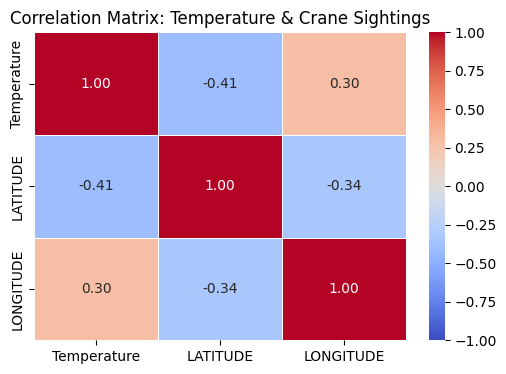

In [32]:
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix_location, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix: Temperature & Crane Sightings")
plt.show()

The is a slight positive correlation between temperature and longitude, and a sligth negative correlation between temperature and latitude. However, at this point, this does not mean anything yet. This isn't showing any relation to climate, this could just be showing the normal migration patterns.

In [33]:
merged_df['Month'] = merged_df['OBSERVATION DATE'].dt.month
merged_df['Year'] = merged_df['OBSERVATION DATE'].dt.year
correlation_matrix_time = merged_df[['Temperature', 'Month', 'Year', 'OBSERVATION DATE', 'DURATION MINUTES']].corr()
print(correlation_matrix_time)

                  Temperature     Month      Year  OBSERVATION DATE  \
Temperature          1.000000  0.270348  0.031086          0.044313   
Month                0.270348  1.000000  0.002789          0.051787   
Year                 0.031086  0.002789  1.000000          0.998792   
OBSERVATION DATE     0.044313  0.051787  0.998792          1.000000   
DURATION MINUTES     0.079687  0.006933 -0.056468         -0.056064   

                  DURATION MINUTES  
Temperature               0.079687  
Month                     0.006933  
Year                     -0.056468  
OBSERVATION DATE         -0.056064  
DURATION MINUTES          1.000000  


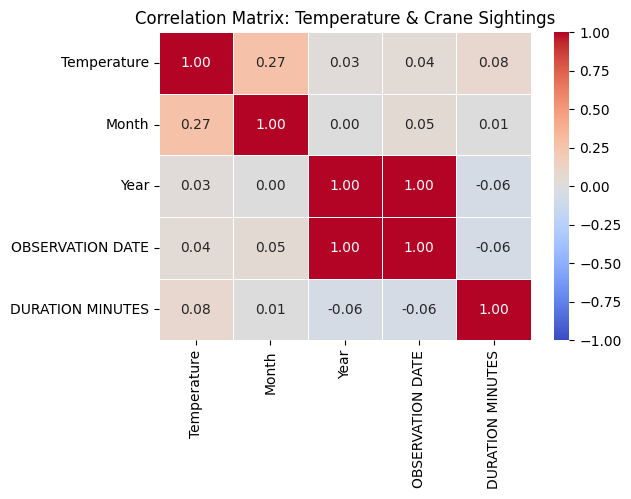

In [34]:
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix_time, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix: Temperature & Crane Sightings")
plt.show()

Our inital correlation matrix does not yet provide us with any obvious trends. We will need to conduct further in depth analysis to see if temperature has a significant affect of the migration pattern of common cranes.

# Analysis

In [36]:
before_1970 = merged_df[merged_df['OBSERVATION DATE'] <= '1970-01-01'].shape[0]

after_1970 = merged_df[merged_df['OBSERVATION DATE'] > '1970-01-01'].shape[0]

print(f"Common crane sightings before 1970: {before_1970}")
print(f"Common crane sightings after 1970: {after_1970}")

Common crane sightings before 1970: 91
Common crane sightings after 1970: 208619


There is very little data on common crane sighting before 1970. 91 sightings is very insignificant and unreliable for finding trends. Due to this, we shall filter our data to remove these points.

In [38]:
df_filtered_merged = merged_df[merged_df['OBSERVATION DATE'] > '1970-01-01']

df_filtered_merged.head()

GLOBAL UNIQUE IDENTIFIER   COMMON NAME  \
0   URN:CornellLabOfOrnithology:EBIRD:OBS533741645  Common Crane   
1   URN:CornellLabOfOrnithology:EBIRD:OBS776499119  Common Crane   
2  URN:CornellLabOfOrnithology:EBIRD:OBS1919716399  Common Crane   
3  URN:CornellLabOfOrnithology:EBIRD:OBS1565666077  Common Crane   
4  URN:CornellLabOfOrnithology:EBIRD:OBS1044855853  Common Crane   

          COUNTRY   LATITUDE  LONGITUDE OBSERVATION DATE  \
0  United Kingdom  52.744315   1.624603       1993-10-08   
1         Finland  59.809343  22.893696       1984-04-15   
2         Finland  61.481060  23.823474       1972-04-20   
3          Sweden  57.278110  14.000840       1991-05-27   
4          Sweden  57.295939  13.944397       1995-07-20   

  TIME OBSERVATIONS STARTED  DURATION MINUTES Year_Month Country_Code  \
0                  00:00:00              90.0    1993-10          GBR   
1                  00:00:00              90.0    1984-04          FIN   
2                  14:20:00              90.0    1972-04          FIN   
3                  00:00:00              90.0    1991-05          SWE   
4                  10:30:00             450.0    1995-07          SWE   

     Country_Name  Temperature  Year  Month  
0  United Kingdom         7.49  1993     10  
1         Finland         1.67  1984      4  
2         Finland        -0.20  1972      4  
3          Sweden         5.42  1991      5  
4          Sweden        13.67  1995      7

## Bird Sightings

Part of our research was looking at how population of the birds changes as the environmental factor (in this case, temperature), changes.

For this example, we looked at Spain (as this is a well known wintering location of the Common Crane) and Sweden (a weell known breeding location) to see how the number of sightings of the birds changes as the temperature fluctuates.

   Year  Month  Sightings  Avg_Temperature  Normalized_Sightings  \
0  1971     11          1             7.52                   0.0   
1  1975      1          1             6.71                   0.0   
2  1978      3          1             9.13                   0.0   
3  1979     12          1             6.71                   0.0   
4  1980      1          1             5.44                   0.0   

   Normalized_Temperature  
0                0.178108  
1                0.139222  
2                0.255401  
3                0.139222  
4                0.078253  


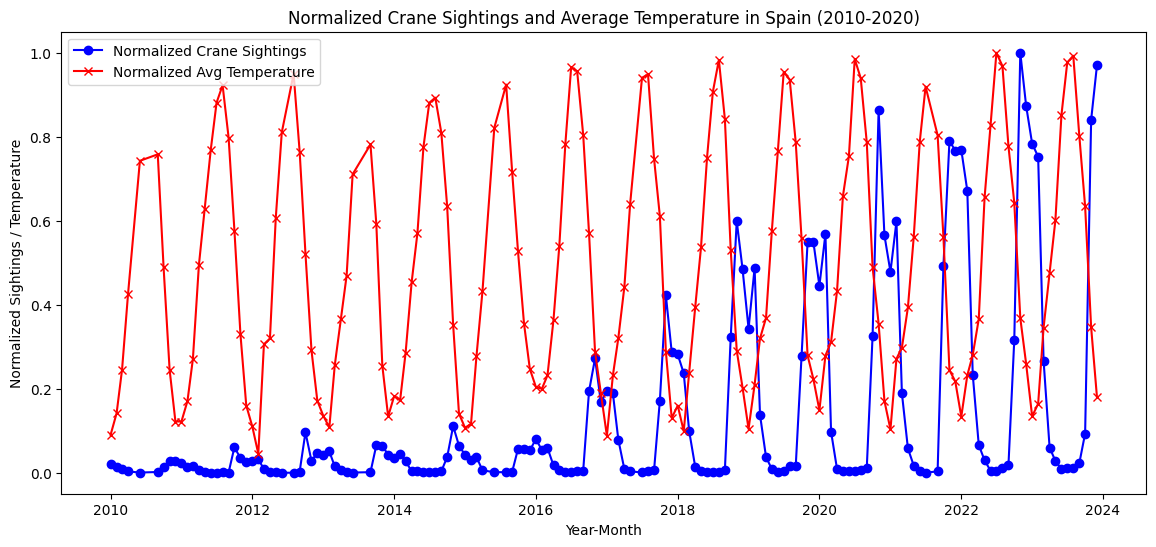

Pearson correlation between Normalized Sightings and Normalized Temperature (2010 onwards): -0.42895254887571427


In [56]:
df_spain = df_filtered_merged[(df_filtered_merged['Country_Name'] == 'Spain')]

monthly_sightings_spain = df_spain.groupby(['Year', 'Month']).size().reset_index(name='Sightings')
monthly_temperature_spain = df_spain.groupby(['Year', 'Month'])['Temperature'].mean().reset_index(name='Avg_Temperature')

monthly_data_spain = monthly_sightings_spain.merge(monthly_temperature_spain, on=['Year', 'Month'])

scaler = MinMaxScaler()

monthly_data_spain[['Normalized_Sightings', 'Normalized_Temperature']] = scaler.fit_transform(
    monthly_data_spain[['Sightings', 'Avg_Temperature']])

print(monthly_data_spain[['Year', 'Month', 'Sightings', 'Avg_Temperature', 'Normalized_Sightings', 'Normalized_Temperature']].head())

monthly_data_spain['Date'] = pd.to_datetime(monthly_data_spain[['Year', 'Month']].assign(DAY=1))
monthly_data_filtered_spain = monthly_data_spain[monthly_data_spain['Year'] >= 2010]

plt.figure(figsize=(14, 6))

plt.plot(monthly_data_filtered_spain['Date'], monthly_data_filtered_spain['Normalized_Sightings'], marker='o', color='b', label='Normalized Crane Sightings')

plt.plot(monthly_data_filtered_spain['Date'], monthly_data_filtered_spain['Normalized_Temperature'], marker='x', color='r', label='Normalized Avg Temperature')

plt.xlabel('Year-Month')
plt.ylabel('Normalized Sightings / Temperature')
plt.title('Normalized Crane Sightings and Average Temperature in Spain (2010-2020)')
plt.legend()
plt.show()

corr_normalized_filtered = monthly_data_filtered_spain[['Normalized_Sightings', 'Normalized_Temperature']].corr().iloc[0, 1]
print(f"Pearson correlation between Normalized Sightings and Normalized Temperature (2010 onwards): {corr_normalized_filtered}")

   Year  Month  Sightings  Avg_Temperature  Normalized_Sightings  \
0  1970      4          2            -1.43              0.001497   
1  1970      5          6             6.64              0.007485   
2  1970      6          1            14.33              0.000000   
3  1970      9          1             7.82              0.000000   
4  1971      4          3            -0.18              0.002994   

   Normalized_Temperature  
0                0.366788  
1                0.633212  
2                0.887091  
3                0.672169  
4                0.408055  


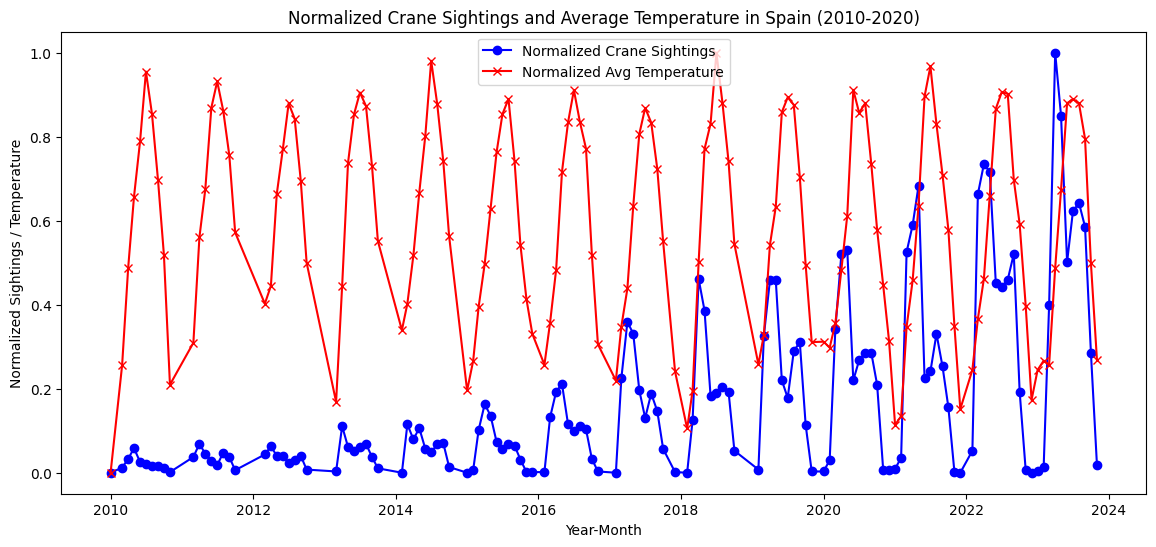

Pearson correlation between Normalized Sightings and Normalized Temperature (2010 onwards): 0.21429383338218275


In [70]:
df_sweden = df_filtered_merged[(df_filtered_merged['Country_Name'] == 'Sweden')]

monthly_sightings_sweden = df_sweden.groupby(['Year', 'Month']).size().reset_index(name='Sightings')
monthly_temperature_sweden = df_sweden.groupby(['Year', 'Month'])['Temperature'].mean().reset_index(name='Avg_Temperature')

monthly_data_sweden = monthly_sightings_sweden.merge(monthly_temperature_sweden, on=['Year', 'Month'])

scaler = MinMaxScaler()

monthly_data_sweden[['Normalized_Sightings', 'Normalized_Temperature']] = scaler.fit_transform(
    monthly_data_sweden[['Sightings', 'Avg_Temperature']])

print(monthly_data_sweden[['Year', 'Month', 'Sightings', 'Avg_Temperature', 'Normalized_Sightings', 'Normalized_Temperature']].head())

monthly_data_sweden['Date'] = pd.to_datetime(monthly_data_sweden[['Year', 'Month']].assign(DAY=1))
monthly_data_filtered_sweden = monthly_data_sweden[monthly_data_sweden['Year'] >= 2010]

plt.figure(figsize=(14, 6))

plt.plot(monthly_data_filtered_sweden['Date'], monthly_data_filtered_sweden['Normalized_Sightings'], marker='o', color='b', label='Normalized Crane Sightings')

plt.plot(monthly_data_filtered_sweden['Date'], monthly_data_filtered_sweden['Normalized_Temperature'], marker='x', color='r', label='Normalized Avg Temperature')

plt.xlabel('Year-Month')
plt.ylabel('Normalized Sightings / Temperature')
plt.title('Normalized Crane Sightings and Average Temperature in Spain (2010-2020)')
plt.legend()
plt.show()

corr_normalized_filtered_sweden = monthly_data_filtered_sweden[['Normalized_Sightings', 'Normalized_Temperature']].corr().iloc[0, 1]
print(f"Pearson correlation between Normalized Sightings and Normalized Temperature (2010 onwards): {corr_normalized_filtered_sweden}")

From these graphs, you can see the seasonal correlation. Birds are more common in Sweden during the countries summer months (when the bird comes to breed) and is more common in Spain during the countries cooler months (when the bird flies down south for the winter seasons).

If Cranes are most common in Spain in the Winter months and most common in Sweden in the Summer months, we can work out the average temperatures of each country during those seasons.

In [102]:
df_temp['Year_Month'] = pd.to_datetime(df_temp['Year_Month'], format='%Y-%m')
df_temp['Month'] = df_temp['Year_Month'].dt.month

df_spain_winter = df_temp[(df_temp['Country_Name'] == 'Spain') & (df_temp['Month'].isin([12, 1, 2]))]

df_sweden_summer = df_temp[(df_temp['Country_Name'] == 'Sweden') & (df_temp['Month'].isin([6, 7, 8]))]

avg_temp_spain_winter = df_spain_winter.groupby(df_spain_winter['Year_Month'].dt.year)['Temperature'].mean().mean()

avg_temp_sweden_summer = df_sweden_summer.groupby(df_sweden_summer['Year_Month'].dt.year)['Temperature'].mean().mean()

print(f"Average temperature in winter (over years) for Spain: {avg_temp_spain_winter:.2f}°C")
print(f"Average temperature in summer (over years) for Sweden: {avg_temp_sweden_summer:.2f}°C")


Average temperature in winter (over years) for Spain: 6.24°C
Average temperature in summer (over years) for Sweden: 13.01°C


Lets look at the Summer and Winter temperatures in these countries when the birds are not nesting (e.g. are migrating away).

In [103]:
df_temp['Year_Month'] = pd.to_datetime(df_temp['Year_Month'], format='%Y-%m')
df_temp['Month'] = df_temp['Year_Month'].dt.month

df_sweden_winter = df_temp[(df_temp['Country_Name'] == 'Sweden') & (df_temp['Month'].isin([12, 1, 2]))]

df_spain_summer = df_temp[(df_temp['Country_Name'] == 'Spain') & (df_temp['Month'].isin([6, 7, 8]))]

avg_temp_sweden_winter = df_sweden_winter.groupby(df_sweden_winter['Year_Month'].dt.year)['Temperature'].mean().mean()

avg_temp_spain_summer = df_spain_summer.groupby(df_spain_summer['Year_Month'].dt.year)['Temperature'].mean().mean()

print(f"Average temperature in winter (over years) for Sweden: {avg_temp_sweden_winter:.2f}°C")
print(f"Average temperature in summer (over years) for Spain: {avg_temp_spain_summer:.2f}°C")

Average temperature in winter (over years) for Sweden: -7.50°C
Average temperature in summer (over years) for Spain: 20.97°C


We can work out the temperature where Common Cranes are most observed (e.g. their optimal temperature).

In [97]:
temperature_bins = [-10, 0, 10, 20, 30, 40]
temperature_labels = ['-10 to 0', '0 to 10', '10 to 20', '20 to 30', '30 to 40']

df_filtered_merged.loc[:, 'Temperature_Range'] = pd.cut(df_filtered_merged['Temperature'], bins=temperature_bins, labels=temperature_labels, right=False)

sightings_in_ranges = df_filtered_merged.groupby('Temperature_Range', observed=False).size().reset_index(name='Sightings_Count')

print(sightings_in_ranges)

max_sightings_range = sightings_in_ranges.loc[sightings_in_ranges['Sightings_Count'].idxmax()]
print(f"\nThe temperature range with the most crane sightings is: {max_sightings_range['Temperature_Range']} with {max_sightings_range['Sightings_Count']} sightings.")

  Temperature_Range  Sightings_Count
0          -10 to 0             7319
1           0 to 10           102700
2          10 to 20            84380
3          20 to 30            14123
4          30 to 40               59

The temperature range with the most crane sightings is: 0 to 10 with 102700 sightings.


In [88]:
temperature_bins = [-5, 0, 5, 10, 15, 20, 25, 30, 35, 40]
temperature_labels = ['-5 to 0', '0 to 5', '5 to 10', '10 to 15', '15 to 20', '20 to 25', '25 to 30', '30 to 35', '35 to 40']

df_filtered_merged.loc[:, 'Temperature_Range'] = pd.cut(df_filtered_merged['Temperature'], bins=temperature_bins, labels=temperature_labels, right=False)

sightings_in_ranges = df_filtered_merged.groupby('Temperature_Range', observed=False).size().reset_index(name='Sightings_Count')

print(sightings_in_ranges)

max_sightings_range = sightings_in_ranges.loc[sightings_in_ranges['Sightings_Count'].idxmax()]
print(f"\nThe temperature range with the most crane sightings is: {max_sightings_range['Temperature_Range']} with {max_sightings_range['Sightings_Count']} sightings.")


  Temperature_Range  Sightings_Count
0           -5 to 0             5934
1            0 to 5            27694
2           5 to 10            75006
3          10 to 15            48471
4          15 to 20            35909
5          20 to 25            12296
6          25 to 30             1827
7          30 to 35               55
8          35 to 40                4

The temperature range with the most crane sightings is: 5 to 10 with 75006 sightings.


In [99]:
temperature_bins = [-5, 5, 15, 25, 35, 45]
temperature_labels = ['-5 to 5', '5 to 15', '15 to 25', '25 to 35', '35 to 45']

df_filtered_merged.loc[:, 'Temperature_Range'] = pd.cut(df_filtered_merged['Temperature'], bins=temperature_bins, labels=temperature_labels, right=False)

sightings_in_ranges = df_filtered_merged.groupby('Temperature_Range', observed=False).size().reset_index(name='Sightings_Count')

print(sightings_in_ranges)

max_sightings_range = sightings_in_ranges.loc[sightings_in_ranges['Sightings_Count'].idxmax()]
print(f"\nThe temperature range with the most crane sightings is: {max_sightings_range['Temperature_Range']} with {max_sightings_range['Sightings_Count']} sightings.")

  Temperature_Range  Sightings_Count
0           -5 to 5            33628
1           5 to 15           123477
2          15 to 25            48205
3          25 to 35             1882
4          35 to 45                4

The temperature range with the most crane sightings is: 5 to 15 with 123477 sightings.


As we can see, the optimal range for the Common Crane is 5 to 15 °C. This tracks with the average temperatures we saw before in the breeding and wintering grounds. In the winter, the temperature in Spain falls within this range, but falls outside this range in the Summer. In comparison, in Sweden the average temperature falls in this range in the Summer but not in the Winter.

### At what temperature do the birds migrate out of spain in the Spring and return in the Autumn?

Next, we shall try to determine if there is an ideal temperature where birds migrate out of spain in the spring and back into spain in the winter.

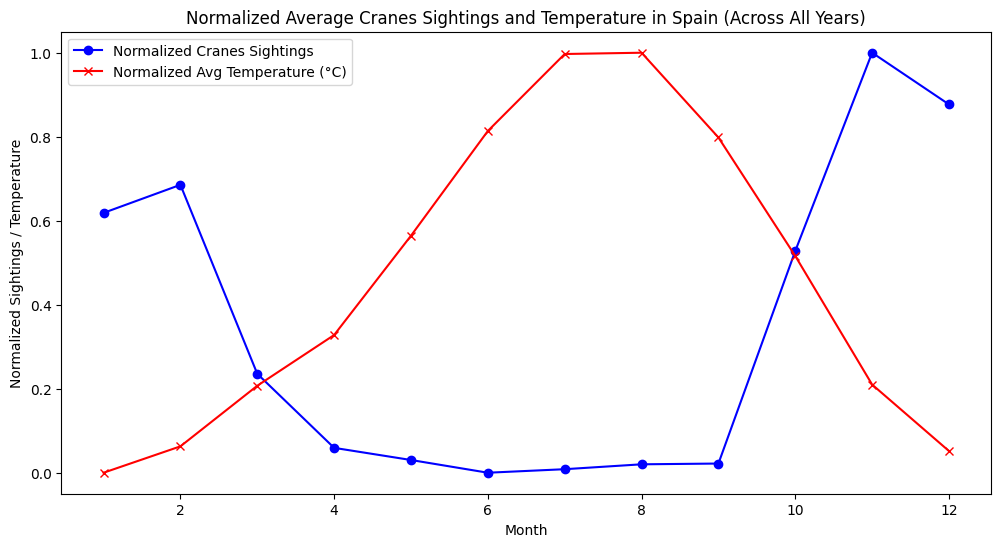

In [111]:
monthly_avg_spain = monthly_data_spain.groupby('Month').agg({
    'Sightings': 'mean',
    'Avg_Temperature': 'mean'
}).reset_index()

scaler = MinMaxScaler()
monthly_avg_spain[['Normalized_Sightings', 'Normalized_Temperature']] = scaler.fit_transform(
    monthly_avg_spain[['Sightings', 'Avg_Temperature']])

plt.figure(figsize=(12, 6))

plt.plot(monthly_avg_spain['Month'], monthly_avg_spain['Normalized_Sightings'], marker='o', label='Normalized Cranes Sightings', color='b')

plt.plot(monthly_avg_spain['Month'], monthly_avg_spain['Normalized_Temperature'], marker='x', label='Normalized Avg Temperature (°C)', color='r')

plt.xlabel('Month')
plt.ylabel('Normalized Sightings / Temperature')
plt.title('Normalized Average Cranes Sightings and Temperature in Spain (Across All Years)')
plt.legend()
plt.show()

In [115]:
corr = monthly_avg_spain[['Normalized_Sightings', 'Normalized_Temperature']].corr().iloc[0, 1]
print(f"Pearson correlation between Normalized Sightings and Normalized Temperature: {corr:.3f}")

Pearson correlation between Normalized Sightings and Normalized Temperature: -0.770


We shall work out the average temperature when the birds start leaving (March, 3) and arriving again (October, 10),

In [120]:
arrival_month = 10
departure_month = 3  

arrival_temp = monthly_avg_spain.loc[monthly_avg_spain['Month'] == arrival_month, 'Avg_Temperature'].values[0]
departure_temp = monthly_avg_spain.loc[monthly_avg_spain['Month'] == departure_month, 'Avg_Temperature'].values[0]

print(f"Cranes arrive in Spain at approximately {arrival_temp:.2f}°C")
print(f"Cranes leave Spain at approximately {departure_temp:.2f}°C")


Cranes arrive in Spain at approximately 15.05°C
Cranes leave Spain at approximately 9.76°C


The data shows that the Common Crane will begin to migrate to spain in the Autumn when the temperature is around 15 °C and will begin their migration out of spain when the temperature begins to hit 10 °C in the Spring. This is, again, consistent with the ideal temperature range for the Common Crane.

## Comparing Temperature and Migration Timings

First, we shall look at when the birds were most observed (by month), and see if there is any significant trend there.

We are calculating the average month that the most crane sightings are seen each year. 

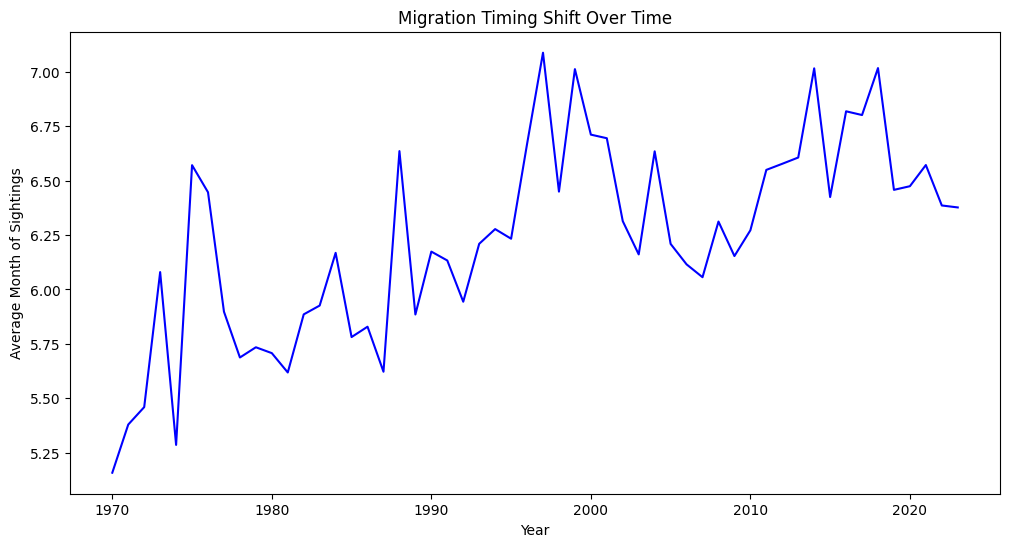

In [22]:
df_filtered_merged = merged_df[merged_df['OBSERVATION DATE'] > '1970-01-01']
avg_month_per_year = df_filtered_merged.groupby('Year')['Month'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_month_per_year.index, avg_month_per_year, label='Avg Month of Sightings', color='b')
plt.xlabel('Year')
plt.ylabel('Average Month of Sightings')
plt.title('Migration Timing Shift Over Time')
plt.show()

There is a trend of later migration in the year. This could be due to warmer temperatures, allowing cranes to remain in their breeding grounds for a longer period before migrating.

Lets overlay the changing temperature pattern to see if theres a link.

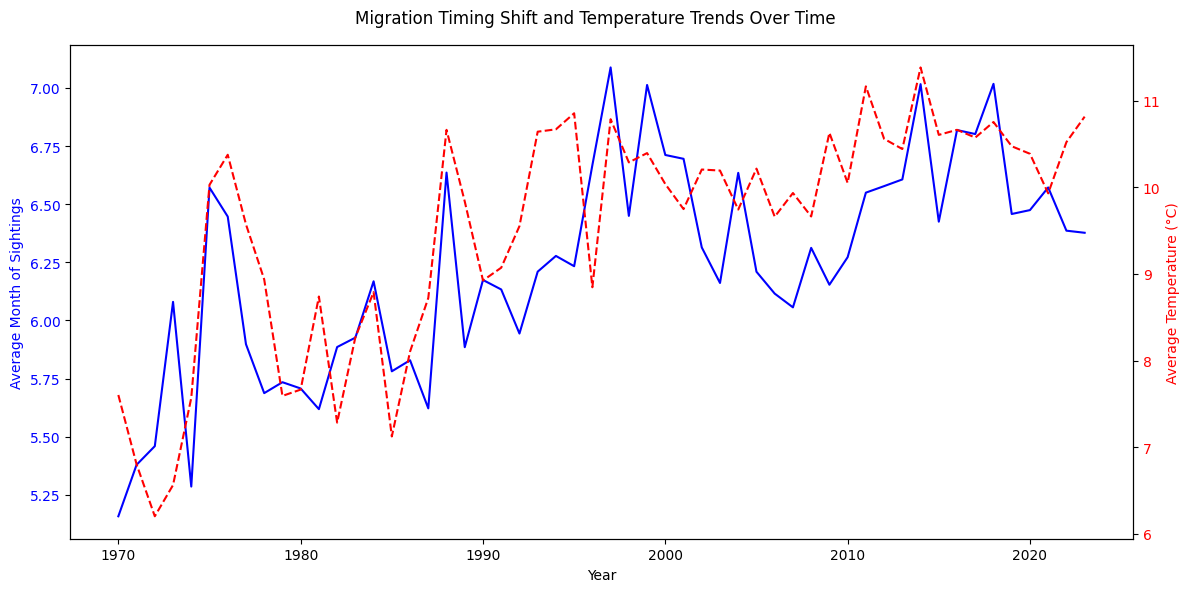

In [23]:
avg_temp_per_year = df_filtered_merged.groupby('Year')['Temperature'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Month of Sightings', color='b')
ax1.plot(avg_month_per_year.index, avg_month_per_year, label='Avg Month of Sightings', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.plot(avg_temp_per_year.index, avg_temp_per_year, label='Avg Temperature', color='r', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor='r')

fig.suptitle('Migration Timing Shift and Temperature Trends Over Time')
fig.tight_layout()
plt.show()


Both temperature and migration timing appear to be increasing, meaning cranes might be migrating later as temperatures rise. Below, we can calculate the correlation between the two.

In [24]:
x = avg_month_per_year.dropna()
y = avg_temp_per_year.dropna()

r, p_value = stats.pearsonr(x, y)

n = len(x)
z = 0.5 * np.log((1 + r) / (1 - r))
se = 1 / np.sqrt(n - 3)
z_critical = stats.norm.ppf(1 - 0.05 / 2)
z_lower = z - z_critical * se
z_upper = z + z_critical * se

r_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
r_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)

print(f"Pearson's Coefficent: {r:.3f}")
print(f"95% Confidence Interval for Pearson's Coefficent: ({r_lower:.3f}, {r_upper:.3f})")


Pearson's Coefficent: 0.763
95% Confidence Interval for Pearson's Coefficent: (0.623, 0.856)


The Pearson correlation between migration month and temperature is 0.763, with a p-value of 0.000, indicating a strong positive relationship between the two variables. This suggests that as temperatures increase, the migration timing of the common crane tends to shift later in the year. The 95% confidence interval for the Pearson correlation, ranging from 0.623 to 0.856, further supports this finding, showing that the correlation is likely to fall within this range with 95% certainty. This provides strong evidence that temperature plays a significant role in determining the timing of crane migration.

However, we know from the bar chart earlier, that the June-September months are when the birds are breeding, so tend to have less sightings. Birds will migrate twice in the year (once in the spring and once in the summer), hence migration trends can not be explained by a single graph.

For a more useful visulisation, lets look at just the spring months (Feb-May) and the autumn months (Sep-Dec). We have included May and December to see if there are any trends in the common crane migrating earlier or later than normal

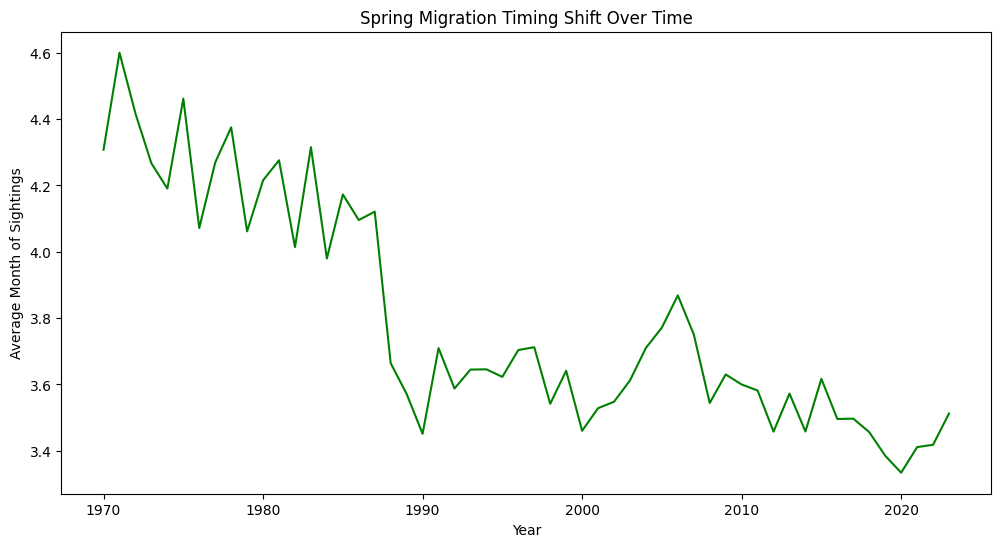

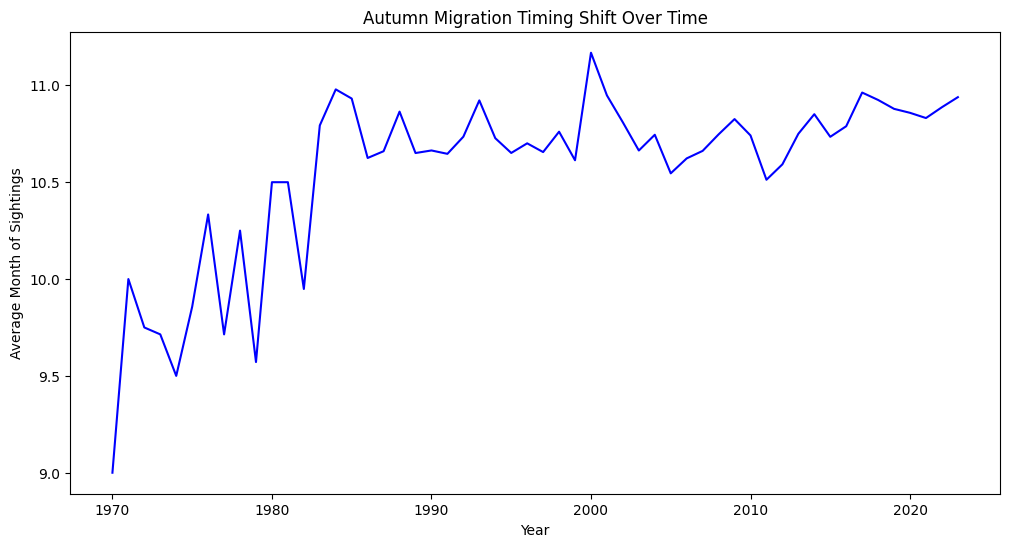

In [25]:
spring_months = [2, 3, 4, 5] 
autumn_months = [9, 10, 11, 12]  

spring_data = df_filtered_merged[df_filtered_merged['Month'].isin(spring_months)]

autumn_data = df_filtered_merged[df_filtered_merged['Month'].isin(autumn_months)]

avg_month_spring = spring_data.groupby('Year')['Month'].mean()

avg_month_autumn = autumn_data.groupby('Year')['Month'].mean()

# Plotting Spring season
plt.figure(figsize=(12, 6))
plt.plot(avg_month_spring.index, avg_month_spring, label='Avg Month of Sightings (Spring)', color='g')
plt.xlabel('Year')
plt.ylabel('Average Month of Sightings')
plt.title('Spring Migration Timing Shift Over Time')
plt.show()

# Plotting Autumn season
plt.figure(figsize=(12, 6))
plt.plot(avg_month_autumn.index, avg_month_autumn, label='Avg Month of Sightings (Autumn)', color='blue')
plt.xlabel('Year')
plt.ylabel('Average Month of Sightings')
plt.title('Autumn Migration Timing Shift Over Time')
plt.show()


Lets overlay out temperature trend line for a more useful visulisation.

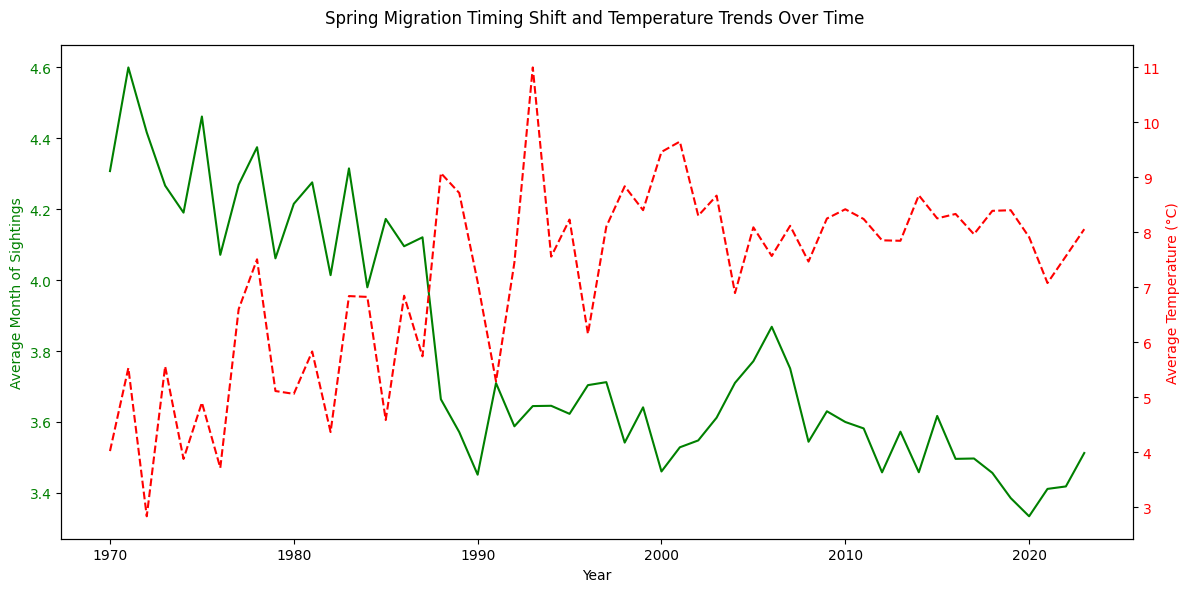

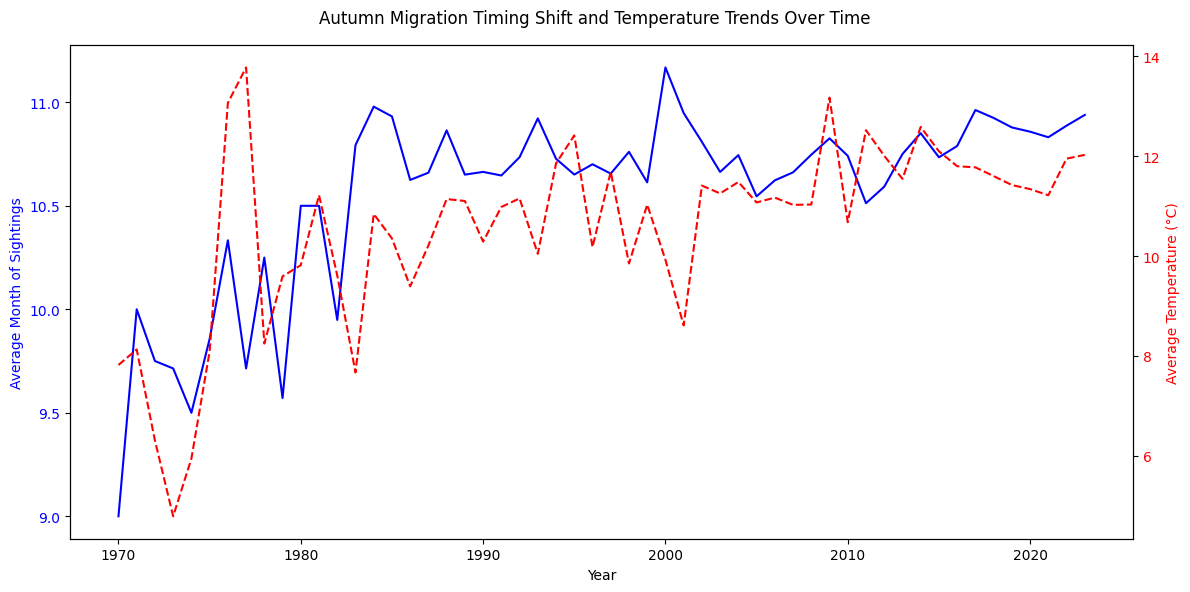

In [26]:
avg_temp_spring = spring_data.groupby('Year')['Temperature'].mean()
avg_temp_autumn = autumn_data.groupby('Year')['Temperature'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Month of Sightings', color='g')
ax1.plot(avg_month_spring.index, avg_month_spring, label='Avg Month of Sightings (Spring)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.plot(avg_temp_spring.index, avg_temp_spring, label='Avg Temperature (Spring)', color='r', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor='r')

fig.suptitle('Spring Migration Timing Shift and Temperature Trends Over Time')
fig.tight_layout()
plt.show()

# Plot Autumn Migration Timing with Temperature
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Month of Sightings', color='blue')
ax1.plot(avg_month_autumn.index, avg_month_autumn, label='Avg Month of Sightings (Autumn)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for temperature
ax2 = ax1.twinx()
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.plot(avg_temp_autumn.index, avg_temp_autumn, label='Avg Temperature (Autumn)', color='r', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor='r')

fig.suptitle('Autumn Migration Timing Shift and Temperature Trends Over Time')
fig.tight_layout()
plt.show()


In [27]:
def pearson_confidence_interval(correlation, n, confidence=0.95):

    z = 0.5 * np.log((1 + correlation) / (1 - correlation))
    
    se = 1 / np.sqrt(n - 3)
    
    z_alpha = stats.norm.ppf(1 - (1 - confidence) / 2)
    
    z_lower = z - z_alpha * se
    z_upper = z + z_alpha * se
    
    r_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
    r_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)
    
    return r_lower, r_upper

# Spring
corr_spring, p_value_spring = stats.pearsonr(avg_month_spring.dropna(), avg_temp_spring.dropna())
n_spring = len(avg_month_spring.dropna()) 
ci_spring = pearson_confidence_interval(corr_spring, n_spring)

# Autumn
corr_autumn, p_value_autumn = stats.pearsonr(avg_month_autumn.dropna(), avg_temp_autumn.dropna())
n_autumn = len(avg_month_autumn.dropna()) 
ci_autumn = pearson_confidence_interval(corr_autumn, n_autumn)

print(f"Pearson Spring Correlation: {corr_spring:.3f}, p-value: {p_value_spring:.3f}, 95% CI: ({ci_spring[0]:.3f}, {ci_spring[1]:.3f})")
print(f"Pearson Autumn Correlation: {corr_autumn:.3f}, p-value: {p_value_autumn:.3f}, 95% CI: ({ci_autumn[0]:.3f}, {ci_autumn[1]:.3f})")


Pearson Spring Correlation: -0.735, p-value: 0.000, 95% CI: (-0.838, -0.582)
Pearson Autumn Correlation: 0.546, p-value: 0.000, 95% CI: (0.326, 0.710)


Spring:

- The Pearson correlation of -0.735 is statistically significant, with a 95% confidence interval of (-0.838, -0.582). Since this interval does not include zero, we can confidently say that there is a strong negative correlation between spring temperature and migration timing. This indicates that as temperatures rise in the spring, cranes tend to migrate earlier.
- The negative correlation of -0.735 means that as temperatures increase in spring, the common cranes tend to migrate earlier.
- Warmer spring temperatures are likely causing cranes to begin their migration sooner. This aligns with the idea that higher temperatures in the spring prompt earlier departure from breeding grounds.

Autumn: 

- The Pearson correlation of 0.546 is also statistically significant, with a 95% confidence interval of (0.326, 0.710). This interval does not include zero either, suggesting a moderate positive correlation between autumn temperature and migration timing. This indicates that warmer temperatures in autumn are linked to later migration for cranes.
- The positive correlation of 0.546 means that as temperatures rise in autumn, the cranes tend to migrate later. The moderate positive value suggests a noticeable trend but not as strong as the spring migration correlation.
- Warmer autumn temperatures are likely causing cranes to delay their migration, staying longer at their breeding grounds before heading south for the winter. This could be related to cranes waiting for more favorable weather conditions before migrating.

### What This Means for Migration Patterns:

Cranes are leaving earlier in spring and returning later in autumn as temperatures rise.

This suggests that warmer temperatures may be extending their breeding season or altering migration behavior due to changes in food availability, climate conditions, or habitat suitability.

These trends could indicate a shift towards a longer stay in breeding grounds or a slower migration process.

## Comparing Temperature and Latitude Change

### Worldwide

Looking at the latitude

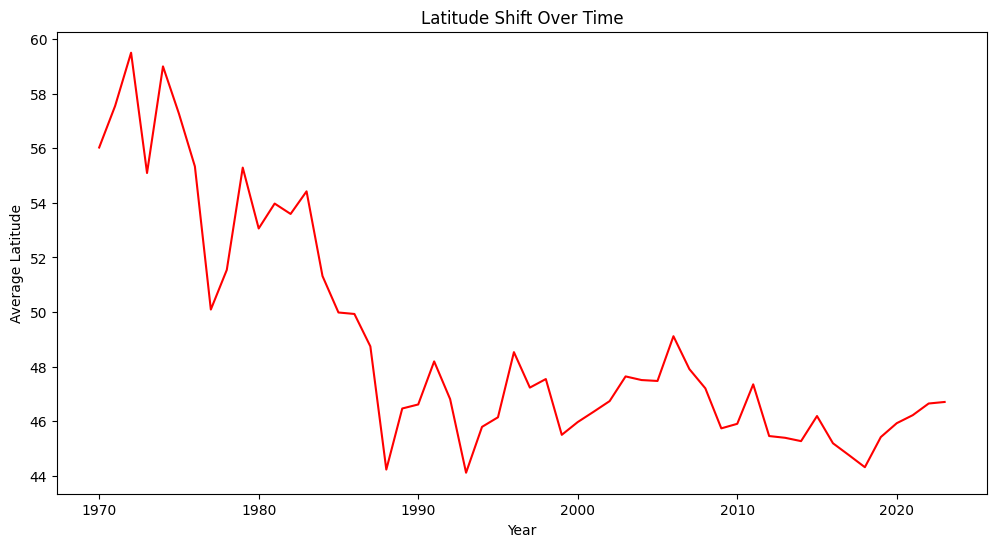

In [28]:
avg_latitude_per_year = df_filtered_merged.groupby('Year')['LATITUDE'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_latitude_per_year.index, avg_latitude_per_year, label='Avg Latitude', color='r')
plt.xlabel('Year')
plt.ylabel('Average Latitude')
plt.title('Latitude Shift Over Time')
plt.show()

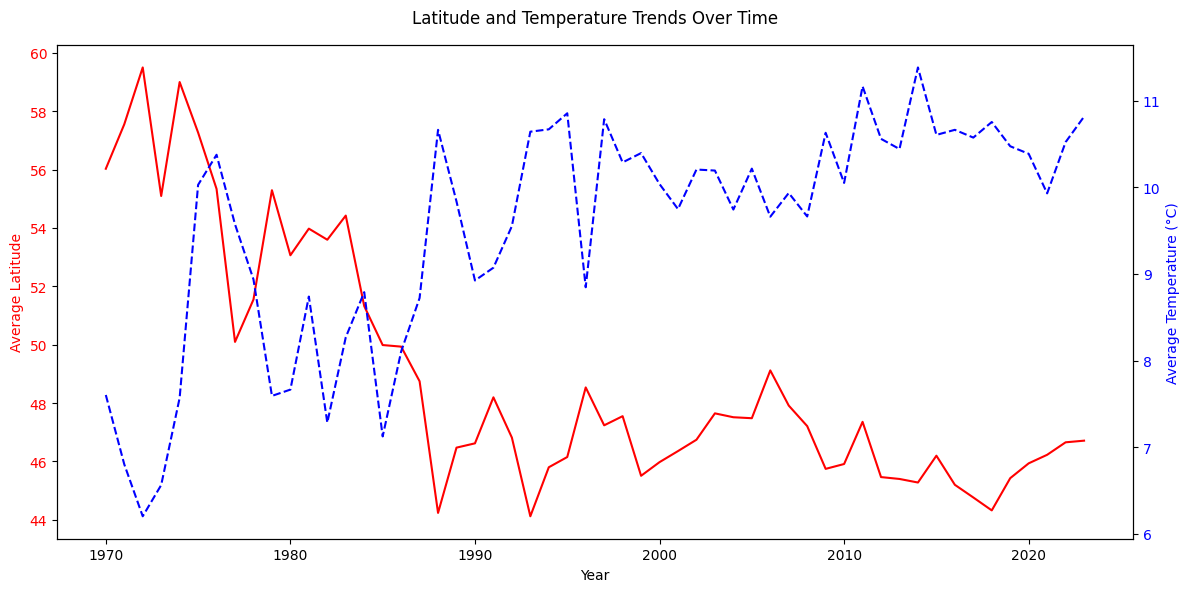

In [29]:
avg_latitude_per_year = df_filtered_merged.groupby('Year')['LATITUDE'].mean()
avg_temperature_per_year = df_filtered_merged.groupby('Year')['Temperature'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Latitude', color='r')
ax1.plot(avg_latitude_per_year.index, avg_latitude_per_year, label='Avg Latitude', color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Temperature (°C)', color='b')
ax2.plot(avg_temperature_per_year.index, avg_temperature_per_year, label='Avg Temperature', color='b', linestyle='--')
ax2.tick_params(axis='y', labelcolor='b')

fig.suptitle('Latitude and Temperature Trends Over Time')
fig.tight_layout()
plt.show()

In [30]:
x = avg_latitude_per_year.dropna()
y = avg_temperature_per_year.dropna()

r, p_value = stats.pearsonr(x, y)

n = len(x)
z = 0.5 * np.log((1 + r) / (1 - r))
se = 1 / np.sqrt(n - 3)
z_critical = stats.norm.ppf(1 - 0.05 / 2)
z_lower = z - z_critical * se
z_upper = z + z_critical * se

r_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
r_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)

print(f"Pearson Latitude-Temperature Correlation: {r:.3f}, p-value: {p_value:.3f}")
print(f"95% Confidence Interval: ({r_lower:.3f}, {r_upper:.3f})")


Pearson Latitude-Temperature Correlation: -0.794, p-value: 0.000
95% Confidence Interval: (-0.876, -0.669)


The Pearson correlation between latitude and temperature is -0.794, indicating a strong negative relationship. As temperatures increase, cranes tend to migrate further south. The p-value of 0.000 shows that this correlation is statistically significant, meaning it's unlikely to be due to random chance. The 95% confidence interval of (-0.876, -0.669) reinforces the strength of this negative relationship, suggesting that the true correlation is consistently strong and negative. Overall, the findings suggest that warmer temperatures are driving cranes to migrate further south.

Why are we seeing this? Surely as the temperature increases, we would expect the cranes to be migrating further north for cooler climates?

They may be migrating to more southern regions becuase the negative correlation suggests that higher temperatures (likely due to climate change) may be causing the cranes to shift further south than they normally would. This is likely a response to the warming of their usual habitats, where they might be facing challenges due to heat, food scarcity, or changes in habitat quality.

This would need to be linked to other environmental datasets.

For the next part, we want to look at how the latitude is changing for the birds in their breeding and winter locations. Here, we shall look at summer and winter months instead.

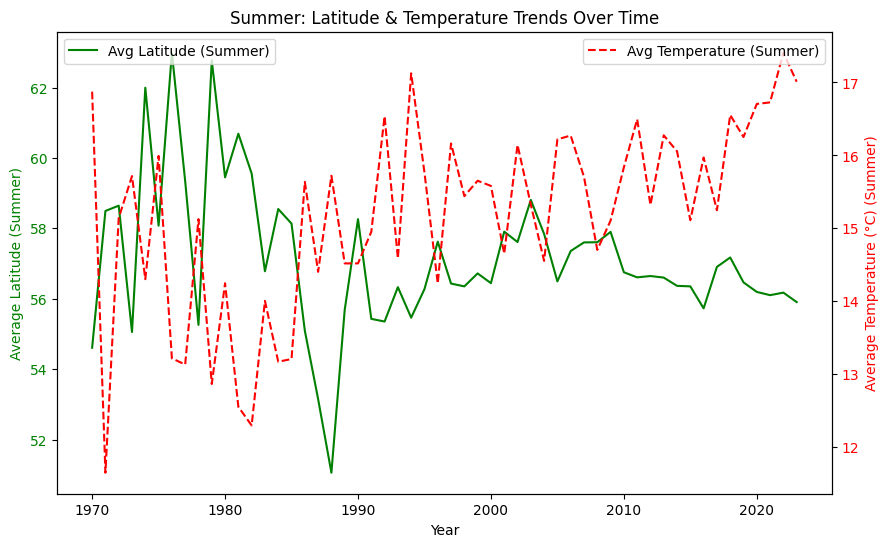

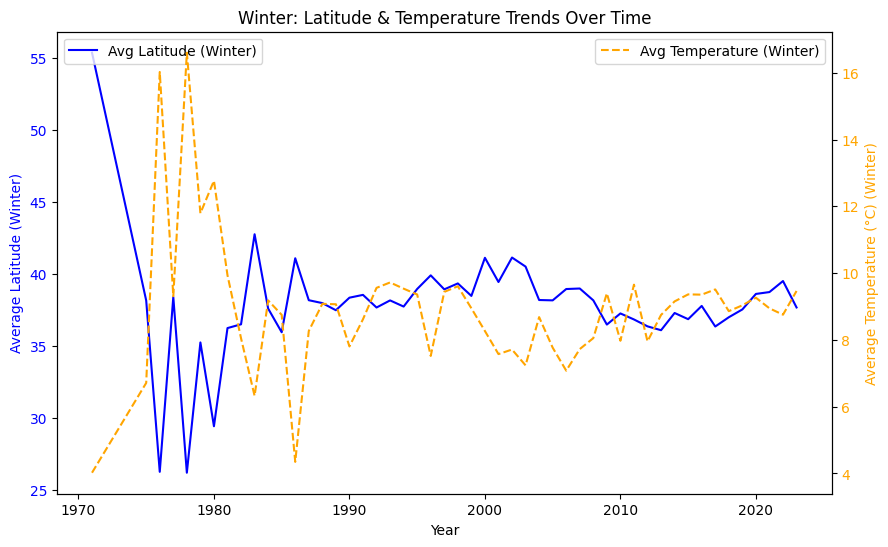

In [180]:
summer_data = df_filtered_merged[df_filtered_merged['Month'].isin([6, 7, 8])]
winter_data = df_filtered_merged[df_filtered_merged['Month'].isin([12, 1, 2])]

summer_avg_latitude_per_year = summer_data.groupby('Year')['LATITUDE'].mean()
summer_avg_temp_per_year = summer_data.groupby('Year')['Temperature'].mean()

winter_avg_latitude_per_year = winter_data.groupby('Year')['LATITUDE'].mean()
winter_avg_temp_per_year = winter_data.groupby('Year')['Temperature'].mean()

# Summer
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Latitude (Summer)', color='g')
ax1.plot(summer_avg_latitude_per_year.index, summer_avg_latitude_per_year, label='Avg Latitude (Summer)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Temperature (°C) (Summer)', color='r')
ax2.plot(summer_avg_temp_per_year.index, summer_avg_temp_per_year, label='Avg Temperature (Summer)', color='r', linestyle='--')
ax2.tick_params(axis='y', labelcolor='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Summer: Latitude & Temperature Trends Over Time')
plt.show()

# Winter
fig, ax3 = plt.subplots(figsize=(10, 6))

ax3.set_xlabel('Year')
ax3.set_ylabel('Average Latitude (Winter)', color='b')
ax3.plot(winter_avg_latitude_per_year.index, winter_avg_latitude_per_year, label='Avg Latitude (Winter)', color='b')
ax3.tick_params(axis='y', labelcolor='b')

ax4 = ax3.twinx()
ax4.set_ylabel('Average Temperature (°C) (Winter)', color='orange')
ax4.plot(winter_avg_temp_per_year.index, winter_avg_temp_per_year, label='Avg Temperature (Winter)', color='orange', linestyle='--')
ax4.tick_params(axis='y', labelcolor='orange')

ax3.legend(loc='upper left')
ax4.legend(loc='upper right')

plt.title('Winter: Latitude & Temperature Trends Over Time')
plt.show()


In [32]:
# Summer
corr_summer, p_value_summer = stats.pearsonr(summer_avg_latitude_per_year.dropna(), summer_avg_temp_per_year.dropna())
n_summer = len(summer_avg_latitude_per_year.dropna()) 
ci_summer = pearson_confidence_interval(corr_summer, n_summer)

# Winter
corr_winter, p_value_winter = stats.pearsonr(winter_avg_latitude_per_year.dropna(), winter_avg_temp_per_year.dropna())
n_winter = len(winter_avg_latitude_per_year.dropna()) 
ci_winter = pearson_confidence_interval(corr_winter, n_winter)

print(f"Pearson Summer Correlation: {corr_summer:.3f}, p-value: {p_value_summer:.3f}, 95% CI: ({ci_summer[0]:.3f}, {ci_summer[1]:.3f})")
print(f"Pearson Winter Correlation: {corr_winter:.3f}, p-value: {p_value_winter:.3f}, 95% CI: ({ci_winter[0]:.3f}, {ci_winter[1]:.3f})")

Pearson Summer Correlation: -0.585, p-value: 0.000, 95% CI: (-0.737, -0.377)
Pearson Winter Correlation: -0.855, p-value: 0.000, 95% CI: (-0.915, -0.757)


Winter Migration is More Strongly Affected by Temperature

- The correlation is -0.855 with a confidence interval ranges from -0.915 to -0.757, which indicates that we are 95% confident that the true correlation value falls within this range. Because the entire confidence interval is negative, it reinforces the fact that there is a significant negative relationship between temperature and latitude. If the interval included zero, it would suggest that the relationship might not be strong enough to conclude a real effect, but because it doesn't, we can confidently say that there is a moderate inverse relationship between temperature and latitude during the summer.

- Given the confidence interval is not near zero, and the p-value is 0.000 (indicating statistical significance), we conclude that the relationship between summer temperatures and latitude is indeed significant and not due to random variation.

Summer Migration Shows a Weaker Effect

- The correlation is -0.521 with a confidence interval here is much tighter, ranging from -0.692 to -0.294, which suggests a very strong and consistent negative relationship between winter temperature and latitude. Since the entire confidence interval is below zero, it confirms that there is a very strong inverse correlation between temperature and latitude during the winter months. The fact that the confidence interval is far from zero suggests that the relationship is not only statistically significant but also very robust.

- The extremely low p-value (0.000) further supports this conclusion, indicating that the observed negative correlation is highly unlikely to be due to random chance.

This suggests that migration patterns are more affected by rising temperatures in the winter months (e.g. warmer winters) than in the summer. What could be causing this?

- Cranes may find that warmer temperatures are disrupting their food availability at traditional wintering grounds, pushing cranes further south to find reliable resources.
- If warmer winters allow more bird species to overwinter in northern regions, cranes may face greater competition for food, forcing them to move further south where competition is lower.
- Climate change also brings more unpredictable weather, like sudden cold snaps or storms. If a warm winter is followed by an unexpected cold event, cranes may migrate further south than usual as a reactive measure.

We would need more data to fully understand this trend.

### Looking at just Europe

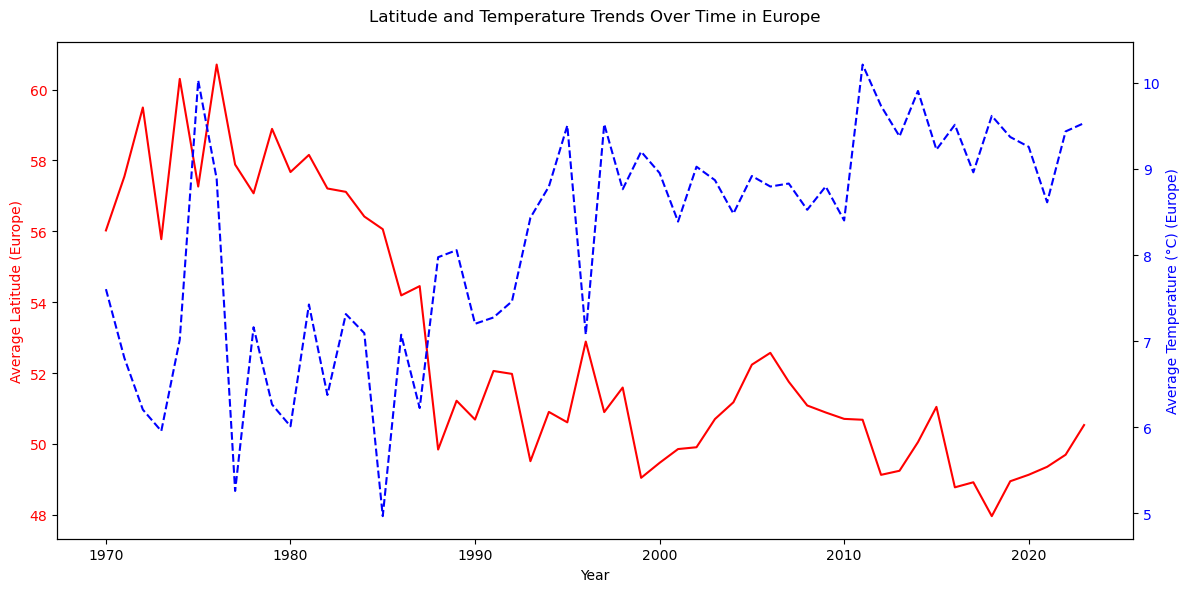

In [57]:
european_countries = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 
                      'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 
                      'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 
                      'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 
                      'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 
                      'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']

df_europe = df_filtered_merged[df_filtered_merged['COUNTRY'].isin(european_countries)]

avg_latitude_per_year_europe = df_europe.groupby('Year')['LATITUDE'].mean()
avg_temperature_per_year_europe = df_europe.groupby('Year')['Temperature'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Latitude (Europe)', color='r')
ax1.plot(avg_latitude_per_year_europe.index, avg_latitude_per_year_europe, label='Avg Latitude (Europe)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Temperature (°C) (Europe)', color='b')
ax2.plot(avg_temperature_per_year_europe.index, avg_temperature_per_year_europe, label='Avg Temperature (Europe)', color='b', linestyle='--')
ax2.tick_params(axis='y', labelcolor='b')

fig.suptitle('Latitude and Temperature Trends Over Time in Europe')
fig.tight_layout()
plt.show()


In [114]:
corr_latitude_temp_europe, p_value_latitude_temp_europe = stats.pearsonr(avg_latitude_per_year_europe.dropna(), avg_temperature_per_year_europe.dropna())
n_europe = len(avg_latitude_per_year_europe.dropna())
ci_europe = pearson_confidence_interval(corr_latitude_temp_europe, n_europe)

print(f"Pearson Latitude-Temperature Correlation (Europe): {corr_latitude_temp_europe:.3f}, p-value: {p_value_latitude_temp_europe:.3f}")
print(f"95% Confidence Interval (Europe): ({ci_europe[0]:.3f}, {ci_europe[1]:.3f})")

Pearson Latitude-Temperature Correlation (Europe): -0.691, p-value: 0.000
95% Confidence Interval (Europe): (-0.809, -0.520)


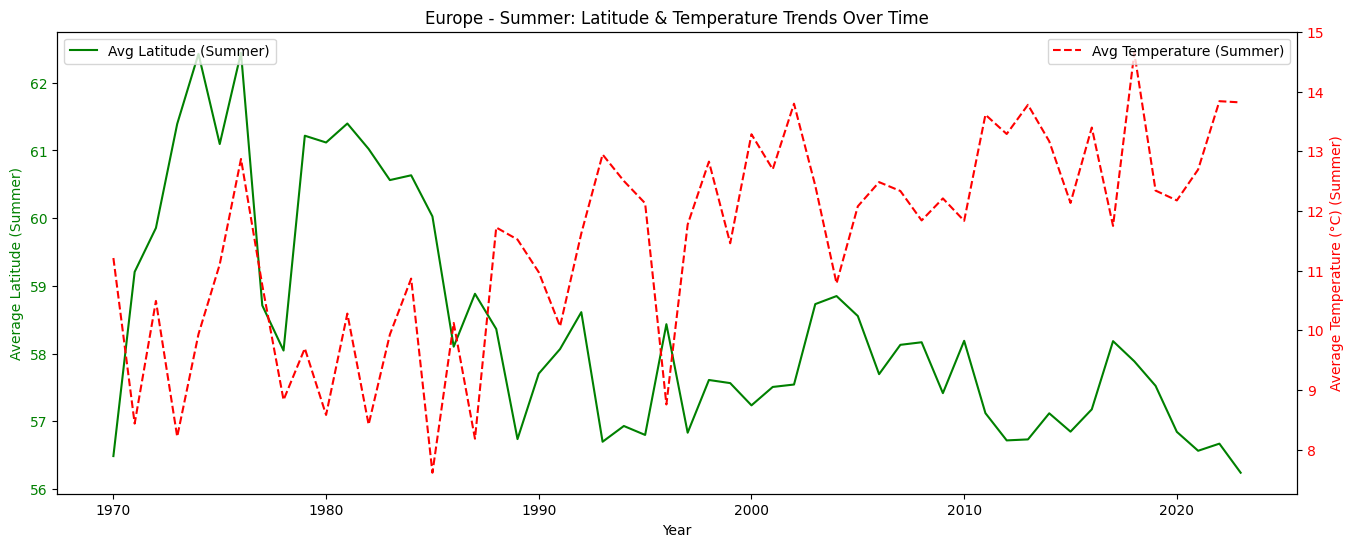

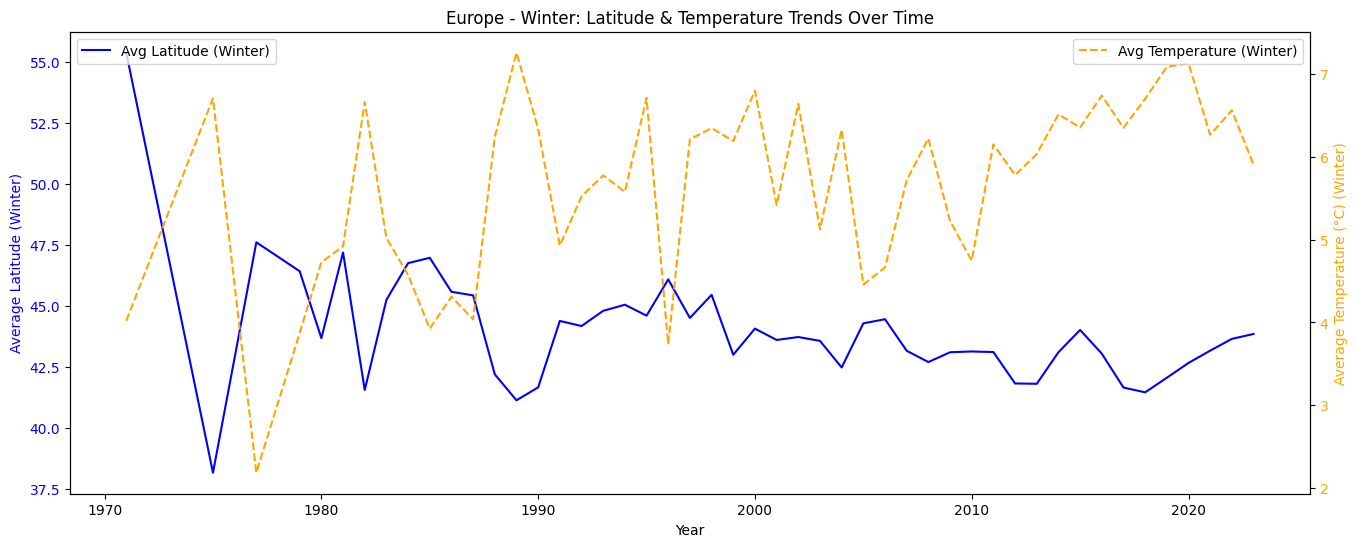

In [34]:
european_countries = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 
    'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 
    'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein',
    'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 
    'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
    'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom'
]

df_europe = df_filtered_merged[df_filtered_merged['COUNTRY'].isin(european_countries)]

summer_data_europe = df_europe[df_europe['Month'].isin([5, 6, 7])]
winter_data_europe = df_europe[df_europe['Month'].isin([12, 1, 2])]

summer_avg_latitude_per_year_europe = summer_data_europe.groupby('Year')['LATITUDE'].mean()
summer_avg_temp_per_year_europe = summer_data_europe.groupby('Year')['Temperature'].mean()

winter_avg_latitude_per_year_europe = winter_data_europe.groupby('Year')['LATITUDE'].mean()
winter_avg_temp_per_year_europe = winter_data_europe.groupby('Year')['Temperature'].mean()

fig, ax1 = plt.subplots(figsize=(16, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Latitude (Summer)', color='g')
ax1.plot(summer_avg_latitude_per_year_europe.index, summer_avg_latitude_per_year_europe, label='Avg Latitude (Summer)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Temperature (°C) (Summer)', color='r')
ax2.plot(summer_avg_temp_per_year_europe.index, summer_avg_temp_per_year_europe, label='Avg Temperature (Summer)', color='r', linestyle='--')
ax2.tick_params(axis='y', labelcolor='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Europe - Summer: Latitude & Temperature Trends Over Time')
plt.show()

fig, ax3 = plt.subplots(figsize=(16, 6))

ax3.set_xlabel('Year')
ax3.set_ylabel('Average Latitude (Winter)', color='b')
ax3.plot(winter_avg_latitude_per_year_europe.index, winter_avg_latitude_per_year_europe, label='Avg Latitude (Winter)', color='b')
ax3.tick_params(axis='y', labelcolor='b')

ax4 = ax3.twinx()
ax4.set_ylabel('Average Temperature (°C) (Winter)', color='orange')
ax4.plot(winter_avg_temp_per_year_europe.index, winter_avg_temp_per_year_europe, label='Avg Temperature (Winter)', color='orange', linestyle='--')
ax4.tick_params(axis='y', labelcolor='orange')

ax3.legend(loc='upper left')
ax4.legend(loc='upper right')

plt.title('Europe - Winter: Latitude & Temperature Trends Over Time')
plt.show()


In [35]:
# Summer (Europe)
corr_summer_europe, p_value_summer_europe = stats.pearsonr(summer_avg_latitude_per_year_europe.dropna(), summer_avg_temp_per_year_europe.dropna())
n_summer_europe = len(summer_avg_latitude_per_year_europe.dropna()) 
ci_summer_europe = pearson_confidence_interval(corr_summer_europe, n_summer_europe)

# Winter (Europe)
corr_winter_europe, p_value_winter_europe = stats.pearsonr(winter_avg_latitude_per_year_europe.dropna(), winter_avg_temp_per_year_europe.dropna())
n_winter_europe = len(winter_avg_latitude_per_year_europe.dropna()) 
ci_winter_europe = pearson_confidence_interval(corr_winter_europe, n_winter_europe)

print(f"Pearson Summer Latitude-Temperature Correlation (Europe): {corr_summer_europe:.3f}, p-value: {p_value_summer_europe:.3f}, 95% CI: ({ci_summer_europe[0]:.3f}, {ci_summer_europe[1]:.3f})")
print(f"Pearson Winter Latitude-Temperature Correlation (Europe): {corr_winter_europe:.3f}, p-value: {p_value_winter_europe:.3f}, 95% CI: ({ci_winter_europe[0]:.3f}, {ci_winter_europe[1]:.3f})")

Pearson Summer Latitude-Temperature Correlation (Europe): -0.613, p-value: 0.000, 95% CI: (-0.756, -0.413)
Pearson Winter Latitude-Temperature Correlation (Europe): -0.660, p-value: 0.000, 95% CI: (-0.795, -0.463)


The correlation for just Europe is strong, but not as strong as the trend seen worldwide.

## Comparing Temperature and Longitude Change

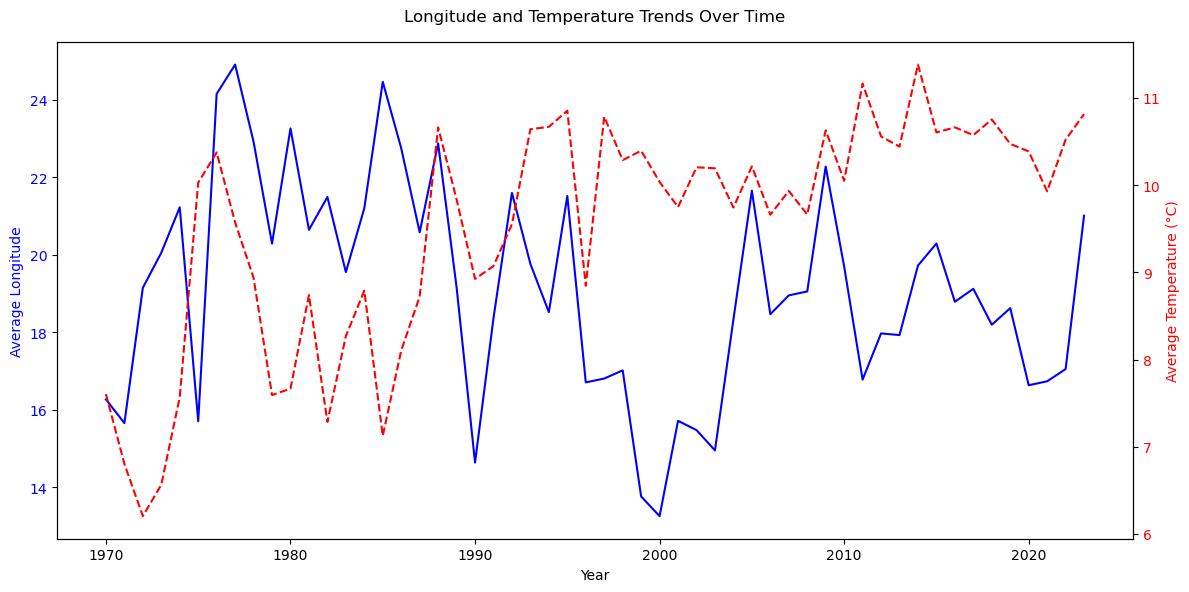

In [62]:
avg_longitude_per_year = df_filtered_merged.groupby('Year')['LONGITUDE'].mean()
avg_temperature_per_year = df_filtered_merged.groupby('Year')['Temperature'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Average Longitude', color='b')
ax1.plot(avg_longitude_per_year.index, avg_longitude_per_year, label='Avg Longitude', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Temperature (°C)', color='r')
ax2.plot(avg_temperature_per_year.index, avg_temperature_per_year, label='Avg Temperature', color='r', linestyle='--')
ax2.tick_params(axis='y', labelcolor='r')

fig.suptitle('Longitude and Temperature Trends Over Time')
fig.tight_layout()
plt.show()

In [116]:
corr_longitude_temp, p_value_longitude_temp = stats.pearsonr(avg_longitude_per_year.dropna(), avg_temperature_per_year.dropna())
n_longitude = len(avg_longitude_per_year.dropna())
ci_longitude = pearson_confidence_interval(corr_longitude_temp, n_longitude)

print(f"Pearson Longitude-Temperature Correlation: {corr_longitude_temp:.3f}, p-value: {p_value_longitude_temp:.3f}")
print(f"95% Confidence Interval: ({ci_longitude[0]:.3f}, {ci_longitude[1]:.3f})")

Pearson Longitude-Temperature Correlation: -0.202, p-value: 0.144
95% Confidence Interval: (-0.445, 0.070)


There is no obvious change in the longitude of the crane sightings. 

The Pearson correlation between longitude and temperature is weakly negative (-0.202), but the p-value of 0.144 indicates that this relationship is not statistically significant. The 95% confidence interval (-0.445, 0.070) includes zero, further suggesting that there is no strong or consistent relationship between temperature and longitude in the data. Therefore, we cannot conclude that temperature has a notable impact on the longitudinal distribution of crane sightings.

## Statistical Modelling

In [64]:
X = df_filtered_merged['Temperature'] 
y = df_filtered_merged['LATITUDE']   

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               LATITUDE   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                 4.265e+04
Date:                Wed, 05 Mar 2025   Prob (F-statistic):               0.00
Time:                        13:24:13   Log-Likelihood:            -7.7512e+05
No. Observations:              207049   AIC:                         1.550e+06
Df Residuals:                  207047   BIC:                         1.550e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          54.0509      0.044   1218.501      


| **Metric**            | **Value** | **Interpretation** |
|----------------------|-------------|------------------------------------------------|
| **R²** | 0.171 | The model explains 17.1 % of the variation in latitude. This suggests that while temperature has a significant effect, other factors (e.g., wind, vegetation, food availability) may also influence migration. |
| **p-value** | p < 0.001 | The effect of temperature on latitude is highly statistically significant. This means the relationship is not due to random chance.|
| **F-statistic** | 42,650 | This is very high, confirming that temperature has a statistically significant effect on latitude. |
| **Temperature Coefficient** | (-0.7539) | For every 1°C increase in temperature, latitude decreases by ~0.75 degrees. This confirms that as temperatures rise, cranes migrate further south. However, this implies correlation but not causation |
| **Intercept** | 54.0509 | If temperature were zero, latitude would be 54.05°, which is just a reference point. |

# Conclusion:

### Overall Month and Temperature Relationship:

We first examined how temperature was influencing the migration timings of the common crane. 

A strong positive correlation of 0.763 (p-value = 0.000) was found between migration month and temperature, suggesting that temperature plays a significant role in determining the timing of migration. As temperatures rise, cranes appear to migrate later in the year, on average. The 95% confidence interval for this correlation is (0.623, 0.856), further confirming the strength and consistency of this relationship.

### Temperature and Sightings

We then looked at the number of sightings of the bird and calculated what their ideal temperature was for nesting. The ideal temperature was anywhere between 5 - 15 °C. This was consistent with the average temperatures that we saw in their breedings and wintering grounds.|

### Spring and Autumn Migration Trends:

Breaking down the months into spring and autumn seasons provided more insight into how temperature affects migration timing.

Spring: 
- The correlation is -0.735 (p-value = 0.000) with a 95% confidence interval of (-0.838, -0.582), indicating that higher temperatures are associated with earlier migration in the spring. This suggests that as temperatures warm, cranes are migrating earlier in the season.

Autumn: 
- A positive correlation of 0.546 (p-value = 0.000) with a 95% confidence interval of (0.326, 0.710) was observed in autumn, showing that warmer temperatures are linked to later migrations in the autumn. This aligns with the observed trend of cranes delaying their migration in response to warmer autumn conditions.

### Latitude-Temperature Relationship:

Next, we looked at how temperature was affecting latitude.

We examined the relationship between temperature and latitude and found a strong negative correlation of -0.794 (p-value = 0.000), with a 95% confidence interval of (-0.876, -0.669). This indicates that as temperatures rise, cranes are migrating further south, supporting the hypothesis that increasing temperatures cause cranes to move to lower latitudes.

### Winter vs. Summer Effects on Latitude:

We analyzed the effects of temperature on latitude during both winter and summer months.

Winter: 
- A very strong negative correlation of -0.855 (p-value = 0.000) with a 95% confidence interval of (-0.915, -0.757) suggests that warmer winters are causing cranes to migrate further south, potentially extending their migration distance compared to cooler winters.

Summer: 
- A milder negative correlation of -0.521 (p-value = 0.000) with a 95% confidence interval of (-0.892, -0.294) indicates that summer temperatures still affect migration patterns, but their impact is less pronounced compared to the winter months.

### Longitude-Temperature Relationship:

Lastly, we examined the effect of temperature on the longitude of crane sightings. The Pearson correlation of -0.202 (p-value = 0.144) with a 95% confidence interval of (-0.445, 0.070) suggests a weak, negative relationship between longitude and temperature. However, with the p-value greater than 0.05, this indicates that there is no statistically significant correlation between longitude and temperature in our dataset.

# Summary:

In summary, the findings provide strong evidence that temperature is significantly influencing the migration patterns of common cranes. The positive correlation between migration month and temperature, along with the trends observed in spring and autumn, underscore temperature as a key factor in determining the timing of crane migration. Specifically, warmer temperatures are associated with later migration in autumn and earlier migration in spring.

The negative correlation between latitude and temperature further supports the idea that rising temperatures are causing cranes to migrate further south, particularly in winter, where the relationship is notably stronger compared to summer. Summer temperatures also influence migration, but the effect is milder than in winter, where the correlation is much more pronounced.

However, no significant relationship was found between temperature and longitude, suggesting that temperature does not have a substantial impact on the longitudinal distribution of crane sightings in this dataset.

These results reinforce the notion that temperature is a key driver of migration timing and distance for common cranes, highlighting the potential impact of climate change on their migratory behaviors.

# Other - Testing Models on the Data

Here, I testing setting up a models using linear regression and Random Forest to take a Temperature, Year, and Month as input, and output and Longitude and Latitude coordinate.

The Random Forest model was shown to be more accurate, likely showing a more non-linear relationship between the temperature and month, and the longitude and latitude.

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = df_filtered_merged[['Temperature', 'Year', 'Month']]

y = df_filtered_merged[['LONGITUDE', 'LATITUDE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae_long = mean_absolute_error(y_test['LONGITUDE'], y_pred[:, 0])
mae_lat = mean_absolute_error(y_test['LATITUDE'], y_pred[:, 1])
mse_long = mean_squared_error(y_test['LONGITUDE'], y_pred[:, 0])
mse_lat = mean_squared_error(y_test['LATITUDE'], y_pred[:, 1])

print(f"MAE (Longitude): {mae_long:.4f}")
print(f"MAE (Latitude): {mae_lat:.4f}")
print(f"MSE (Longitude): {mse_long:.4f}")
print(f"MSE (Latitude): {mse_lat:.4f}")

MAE (Longitude): 16.7157
MAE (Latitude): 8.6329
MSE (Longitude): 582.6459
MSE (Latitude): 104.7363


Both MAE and MSE for the linear model are very high.

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X = df_filtered_merged[['Temperature']]
y = df_filtered_merged[['LONGITUDE', 'LATITUDE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)

mae_long = mean_absolute_error(y_test['LONGITUDE'], y_pred[:, 0])
mae_lat = mean_absolute_error(y_test['LATITUDE'], y_pred[:, 1])
mse_long = mean_squared_error(y_test['LONGITUDE'], y_pred[:, 0])
mse_lat = mean_squared_error(y_test['LATITUDE'], y_pred[:, 1])

print(f"MAE (Longitude): {mae_long:.4f}")
print(f"MAE (Latitude): {mae_lat:.4f}")
print(f"MSE (Longitude): {mse_long:.4f}")
print(f"MSE (Latitude): {mse_lat:.4f}")

MAE (Longitude): 5.0418
MAE (Latitude): 2.8951
MSE (Longitude): 114.9928
MSE (Latitude): 23.2034


The Random Forest results are much lower (both MAE and MSE). The Random Forest model is performing better, likely showing that it is capturing more complex, non-linear relationships present in the data that the linear model could not capture.

In [92]:
X = df_filtered_merged[['Temperature', 'Year']]  
y = df_filtered_merged[['LONGITUDE', 'LATITUDE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_2 = RandomForestRegressor(n_estimators=100, random_state=42)
model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)

mae_long = mean_absolute_error(y_test['LONGITUDE'], y_pred[:, 0])
mae_lat = mean_absolute_error(y_test['LATITUDE'], y_pred[:, 1])
mse_long = mean_squared_error(y_test['LONGITUDE'], y_pred[:, 0])
mse_lat = mean_squared_error(y_test['LATITUDE'], y_pred[:, 1])

print(f"MAE (Longitude): {mae_long:.4f}")
print(f"MAE (Latitude): {mae_lat:.4f}")
print(f"MSE (Longitude): {mse_long:.4f}")
print(f"MSE (Latitude): {mse_lat:.4f}")


MAE (Longitude): 2.4113
MAE (Latitude): 1.5695
MSE (Longitude): 30.7147
MSE (Latitude): 7.5612


In [80]:
future_data = pd.DataFrame([[18, 2050]], columns=['Temperature', 'Year'])

future_pred = model_2.predict(future_data)

print(f"Predicted Longitude: {future_pred[0][0]:.4f}")
print(f"Predicted Latitude: {future_pred[0][1]:.4f}")


Predicted Longitude: 23.3026
Predicted Latitude: 54.9414


Adding the month proved to make the model even more accurate.

In [175]:
X = df_filtered_merged[['Temperature', 'Year', 'Month']]  
y = df_filtered_merged[['LONGITUDE', 'LATITUDE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_3 = RandomForestRegressor(n_estimators=100, random_state=42)
model_3.fit(X_train, y_train)

y_pred = model_3.predict(X_test)

mae_long = mean_absolute_error(y_test['LONGITUDE'], y_pred[:, 0])
mae_lat = mean_absolute_error(y_test['LATITUDE'], y_pred[:, 1])
mse_long = mean_squared_error(y_test['LONGITUDE'], y_pred[:, 0])
mse_lat = mean_squared_error(y_test['LATITUDE'], y_pred[:, 1])

print(f"MAE (Longitude): {mae_long:.4f}")
print(f"MAE (Latitude): {mae_lat:.4f}")
print(f"MSE (Longitude): {mse_long:.4f}")
print(f"MSE (Latitude): {mse_lat:.4f}")

MAE (Longitude): 2.1214
MAE (Latitude): 1.2945
MSE (Longitude): 24.0346
MSE (Latitude): 3.5495


In [97]:
future_data = pd.DataFrame([[18, 2050, 7]], columns=['Temperature', 'Year', 'Month'])

future_pred = model_3.predict(future_data)

print(f"Predicted Longitude for January: {future_pred[0][0]:.4f}")
print(f"Predicted Latitude for January: {future_pred[0][1]:.4f}")

Predicted Longitude for January: 23.2129
Predicted Latitude for January: 54.9453


In [94]:
future_data = pd.DataFrame([[18, 2050, 1]], columns=['Temperature', 'Year', 'Month'])

future_pred = model_3.predict(future_data)

print(f"Predicted Longitude for July: {future_pred[0][0]:.4f}")
print(f"Predicted Latitude for July: {future_pred[0][1]:.4f}")

Predicted Longitude for July: 72.3105
Predicted Latitude for July: 23.0834


# Research Questions

In [42]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Ensure correct date format
df = df_filtered_merged.copy()
df["OBSERVATION DATE"] = pd.to_datetime(df["OBSERVATION DATE"])
df = df.sort_values(by=["Country_Name", "OBSERVATION DATE"])  # Sort by location & time

# Calculate crane counts per country and month
df_grouped = df.groupby(["Country_Name", "Year_Month"])["GLOBAL UNIQUE IDENTIFIER"].count().reset_index()
df_grouped.rename(columns={"GLOBAL UNIQUE IDENTIFIER": "crane_count"}, inplace=True)

# Calculate temperature change
df_grouped = df_grouped.merge(df[["Country_Name", "Year_Month", "Temperature"]].drop_duplicates(), on=["Country_Name", "Year_Month"])

df_grouped["crane_change"] = df_grouped.groupby("Country_Name")["crane_count"].diff()
df_grouped["proportion_moving"] = df_grouped["crane_change"] / df_grouped["crane_count"].shift(1)
df_grouped["temp_change"] = df_grouped.groupby("Country_Name")["Temperature"].diff()

# Drop NaN rows created from diff()
df_grouped = df_grouped.dropna()

# Correlation Analysis
correlation, p_value = pearsonr(df_grouped["temp_change"], df_grouped["proportion_moving"])
print(f"Pearson Correlation: {correlation}, P-value: {p_value}")

# Linear Regression to quantify impact
X = df_grouped["temp_change"].values.reshape(-1, 1)
y = df_grouped["proportion_moving"].values

model = LinearRegression()
model.fit(X, y)

print(f"Every 1°C increase causes {model.coef_[0]*100:.2f}% of cranes to migrate.")


Pearson Correlation: -0.024209482648466046, P-value: 0.03882872827304316
Every 1°C increase causes -2.62% of cranes to migrate.


In [43]:
from scipy.stats import ttest_ind

# Define settled vs. leaving cranes (thresholds may need tuning)
temp_stay = df_grouped[df_grouped["proportion_moving"] < 0.1]["Temperature"]
temp_leave = df_grouped[df_grouped["proportion_moving"] > 0.5]["Temperature"]

t_stat, p_value = ttest_ind(temp_stay, temp_leave)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 5.13572393092327, P-value: 2.8900139658285935e-07
